In [1]:
import nmresearch as nmr

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
def slope_fit(data, start, end, t_list):
    if end > 35:
        return 0
    x = np.log(t_list[start: end])
    X = sm.add_constant(x)
    y = -np.log(data[start:end].flatten())
    ols = sm.OLS(y, X)
    ols_result = ols.fit()
    slopes = ols_result.params[1]
    intercept = ols_result.params[0]
    err = ols_result.conf_int()[1, 1] - ols_result.params[1]
    return slopes,intercept,err

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


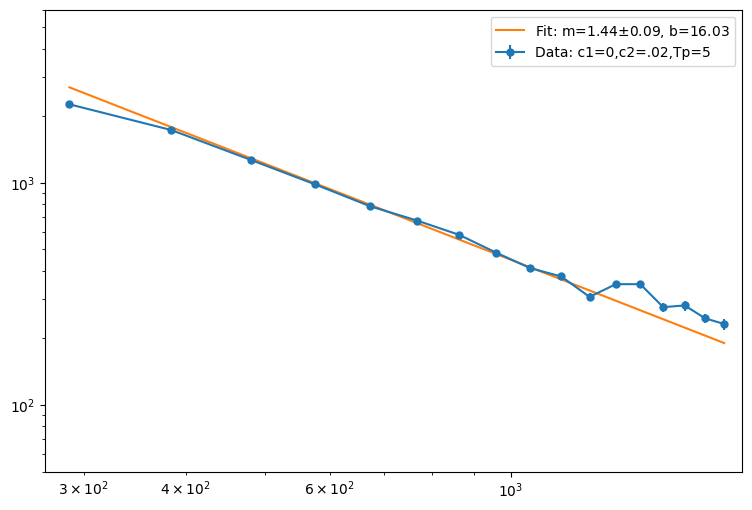

In [4]:
# 4/9, pp=ken_diff5_mid_fc12
# c1=0, c2=.02
# T0 = 3, Tf=20
# 5 prep cycles
expt = nmr.Experiment(623, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,2,11,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()


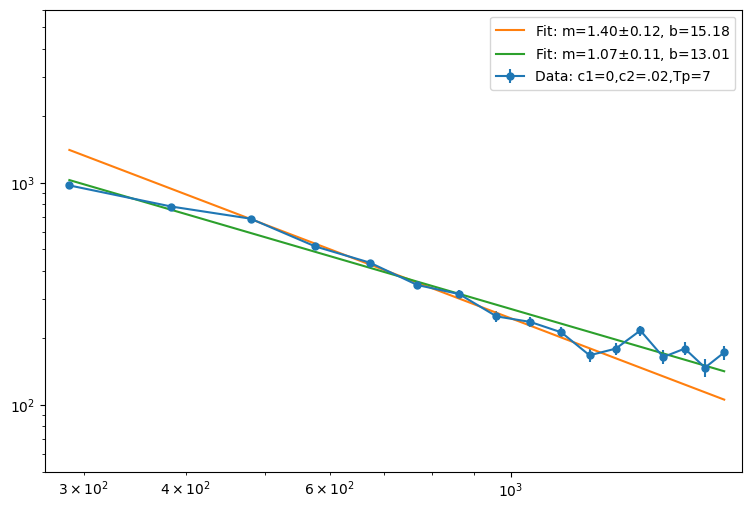

In [5]:
# 4/10, pp=ken_diff7_mid_fc12
# c1=0, c2=.02
# T0 = 3, Tf=20
# 7 prep cycles
expt = nmr.Experiment(625, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,2,11,times)
m0,b0,err0 = slope_fit(data,0,17,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.02,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.plot(times, np.exp(-m0*np.log(times)-b0), label=f"Fit: m={m0:.2f}"+ r"$\pm$" + f"{err0:.2f}, b={-b0:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

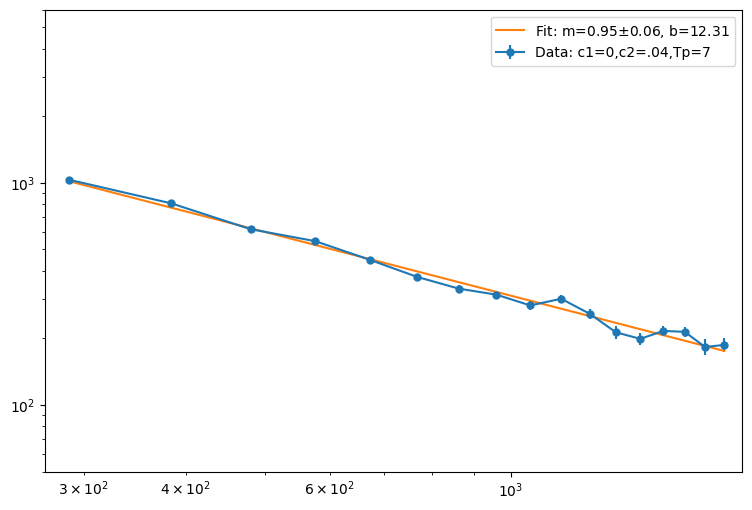

In [6]:
# 4/10, pp=ken_diff7_mid_fc12
# c1=0, c2=.04
# T0 = 3, Tf=20
# 7 prep cycles
# No retune before running experiment - off-resonant driving -> larger disorder?

expt = nmr.Experiment(629, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,0,17,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.04,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

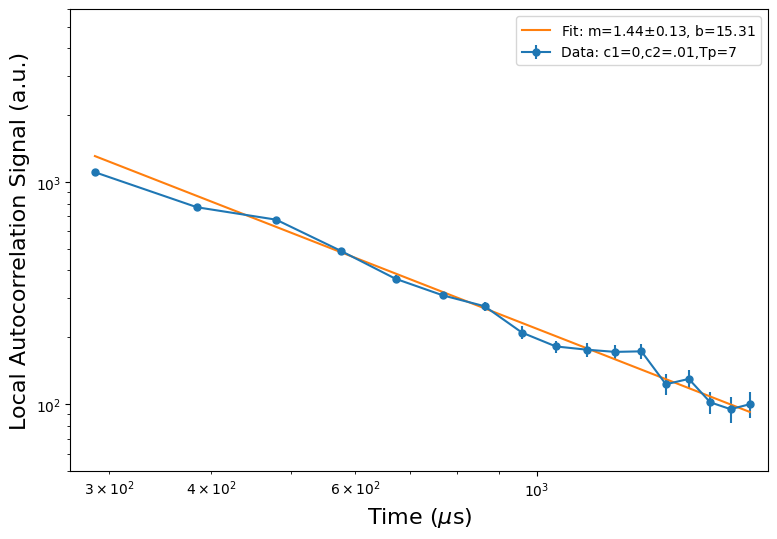

In [7]:
# 4/11, pp=ken_diff7_mid_fc12
# c1=0, c2=.01
# T0 = 3, Tf=20
# 7 prep cycles
expt = nmr.Experiment(631, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m0,b0,err0 = slope_fit(data,0,17,times)
m,b,err = slope_fit(data,2,16,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
#ax.plot(times, np.exp(-m0*np.log(times)-b0), label=f"Fit: m={m0:.2f}"+ r"$\pm$" + f"{err0:.2f}, b={-b0:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.xlabel(r"Time ($\mu$s)", fontsize=16)
plt.ylabel(f"Local Autocorrelation Signal (a.u.)", fontsize=16)
plt.show()

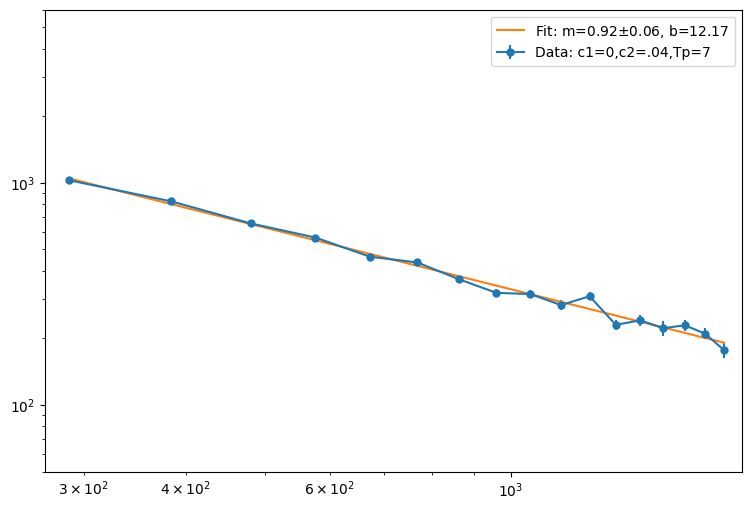

In [8]:
# 4/14, pp=ken_diff7_mid_fc12
# c1=0, c2=.04
# T0 = 3, Tf=20
# 7 prep cycles
# fresh tune

expt = nmr.Experiment(637, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,0,17,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.04,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

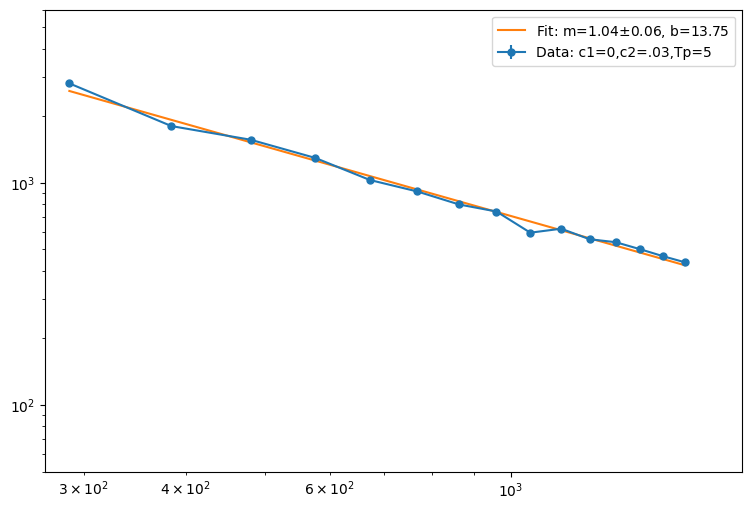

In [9]:
# 4/16, pp=ken_diff5_direct_mid_fc12
# c1=0, c2=.03
# T0 = 3, Tf=18
# 5 prep cycles
# fresh tune - no solid echo

expt = nmr.Experiment(644, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,18,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.03,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

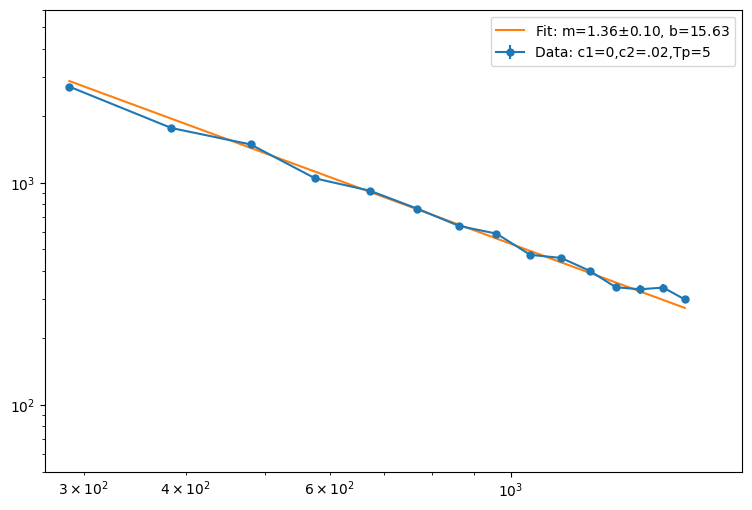

In [10]:
# 4/17, pp=ken_diff5_direct_mid_fc12
# c1=0, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo

expt = nmr.Experiment(646, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

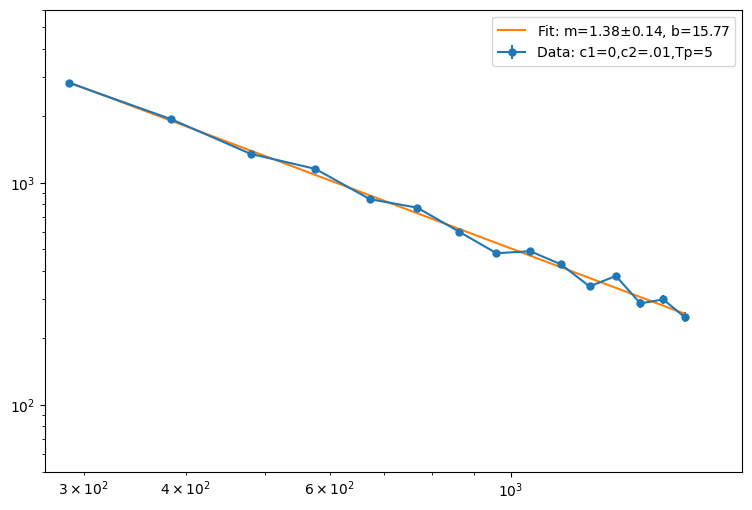

In [11]:
# 4/17, pp=ken_diff5_direct_mid_fc12
# c1=0, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo

expt = nmr.Experiment(648, folder='expt9')
real = expt.load_tpc(normalize=False,use_real=True)
imag = expt.load_tpc(normalize=False,use_real=False)
data = real
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{1.96*err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

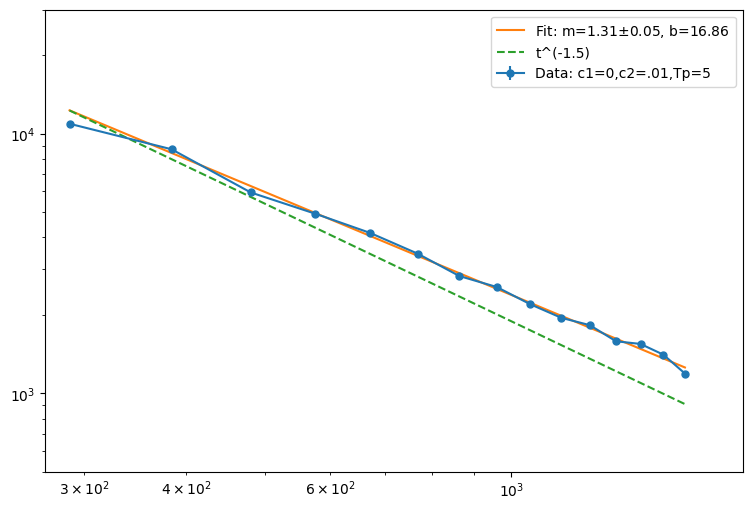

In [12]:
# 4/18, pp=ken_diff5_pub_direct_mid_fc13
# c1=0, c2=.01
# 4-fold phase cycle of prep
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo

expt = nmr.Experiment(653, folder='expt9')
real = expt.load_tpc3d(normalize=False,use_real=True)
imag = expt.load_tpc3d(normalize=False,use_real=False)
data = real.sum(axis=1)
err_data = np.real(expt.nmr_data).sum(axis=1)
errs = np.std(err_data[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.plot(times, .6e8*times**(-1.5), label=f"t^(-1.5)", linestyle='--')
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e2,3e4)
plt.show()

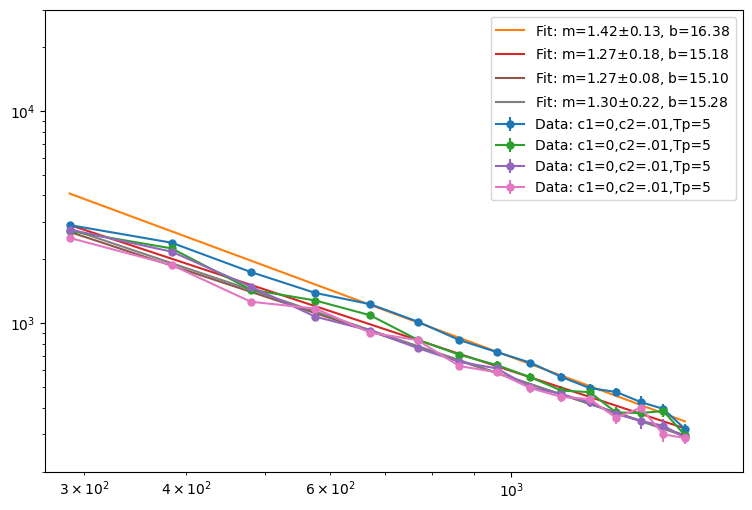

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
for i in range(4):
    data = real[:,i]
    times = np.arange(3*T, 18*T,T)
    m,b,err = slope_fit(data,5,15,times) 
    ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=5",marker="o",markersize=5)
    ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
    #ax.plot(times, .6e8*times**(-1.5), label=f"t^(-1.5)", linestyle='--')



ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(2e2,3e4)
plt.show()

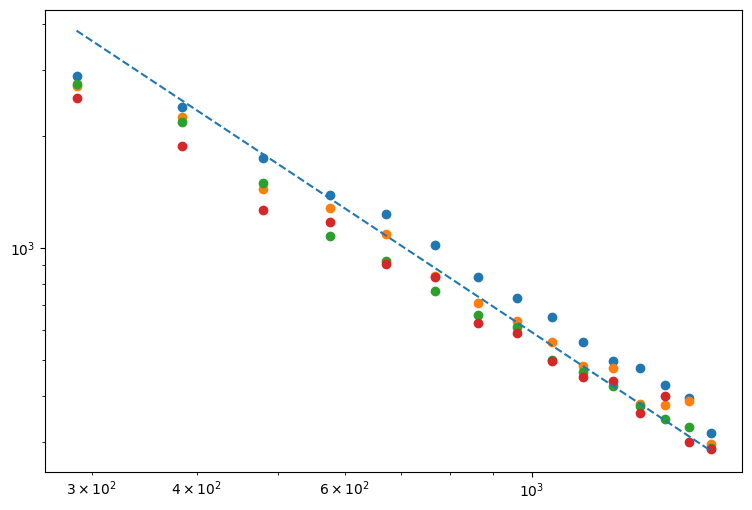

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(times,real[:,0])
ax.scatter(times,real[:,1])
ax.scatter(times,real[:,2])
ax.scatter(times,real[:,3])
ax.plot(times, .75e8/4*times**(-1.5), label=f"t^(-1.5)", linestyle='--')
plt.show()

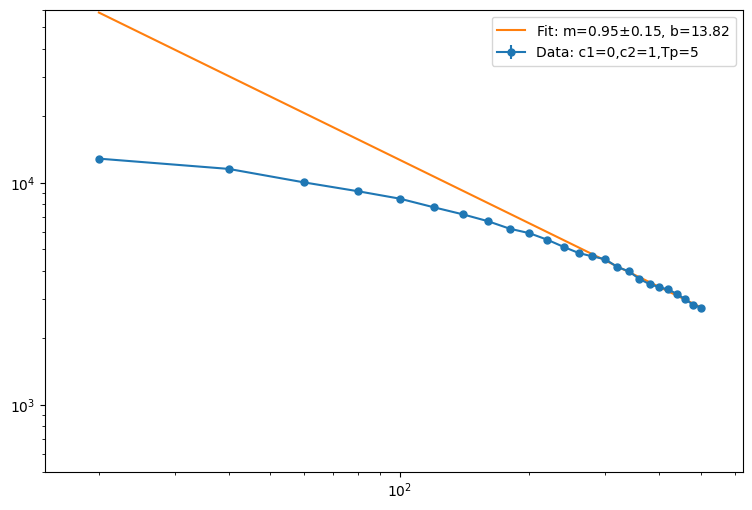

In [15]:
# 5/8, pp=pi_diff_fc0
# c1=0, c2=1
# T0 = 1, Tf=25
# 5 prep cycles
# no solid echo
# clearly this works very poorly

expt = nmr.Experiment(670, folder='expt9')
real = expt.load_tpc(normalize=False,use_real=True)
imag = expt.load_tpc(normalize=False,use_real=False)
data = real
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T=20
times = np.arange(1*T, 26*T,T)
m,b,err = slope_fit(data,14,24,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=1,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{1.96*err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(.75*T, 1.25*25*T)
plt.ylim(5e2,6e4)
plt.show()

In [16]:
# return to ken-based sequences
T = 24*4

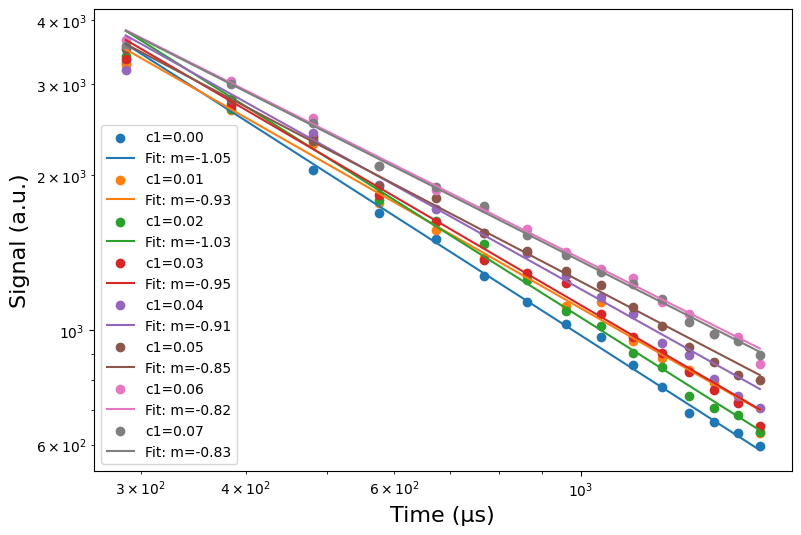

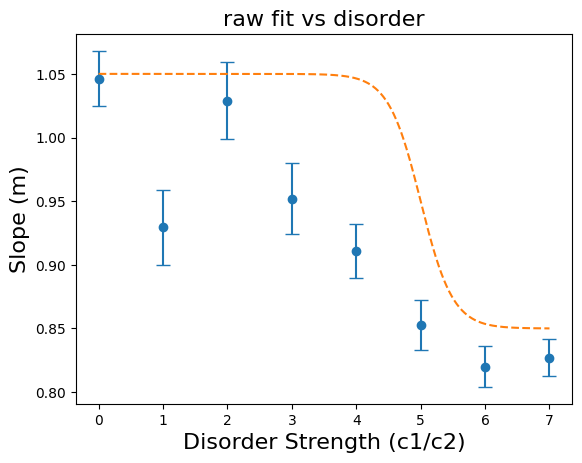

In [17]:
# 5/8-5/10, pp=ken_diff5_direct_mid_fc10_3d
# c1=[0,.01,.02,.03,.04,.05,.06,.07], c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(676, folder='expt9')
err_data = np.real(expt.nmr_data)
data = expt.load_tpc3d(normalize=False,use_real=True)
c1_list = [0,.01,.02,.03,.04,.05,.06,.07]
c2 = .01
times = np.arange(3*T, 18*T,T)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
errs = np.mean(err_data[:,:, -50:], axis=1)

slopes_v1 = {}
slopes_v1_err = {}
intercepts_v1 = {}

start = 1
end = 12

for i, c1 in enumerate(c1_list):
    series = data[i]
    log_times = np.log(times[start:end])
    log_series = np.log(data[i][start:end])
    # Perform linear regression with statsmodels to extract error bars
    X = sm.add_constant(log_times)
    model = sm.OLS(log_series, X)
    results = model.fit()
    m = results.params[1]
    b = results.params[0]
    m_err = results.bse[1]  # Standard error for the slope
    b_err = results.bse[0]  # Standard error for the intercept
    
    slopes_v1[(c1, c2)] = -1*m
    slopes_v1_err[(c1, c2)] = m_err
    intercepts_v1[(c1, c2)] = b
    ax.scatter(times, series, label=f"c1={c1:.2f}", marker="o")
    ax.plot(times, np.exp(m * np.log(times) + b), label=f"Fit: m={m:.2f}")

ax.legend()
ax.set_xlabel("Time (μs)", fontsize=16)
ax.set_ylabel("Signal (a.u.)", fontsize=16)
plt.show()

dis_stren = [key[0]/key[1] for key in slopes_v1.keys()]
plt.errorbar(dis_stren, slopes_v1.values(), yerr=slopes_v1_err.values(), fmt='o', capsize=5, label="Slope vs Disorder Strength")
disorder = np.arange(dis_stren[0], dis_stren[-1], 0.01)
plt.plot(disorder, .1*(1-np.tanh(2*(disorder-5)))+.85, label="Tanh Fit", linestyle='--')
plt.xlabel("Disorder Strength (c1/c2)", fontsize=16)
plt.ylabel("Slope (m)", fontsize=16)
plt.title("raw fit vs disorder", fontsize=16)
plt.show()
    


In [18]:
slopes_v2 = {}
slopes_v2_err = {}
intercepts_v2 = {}

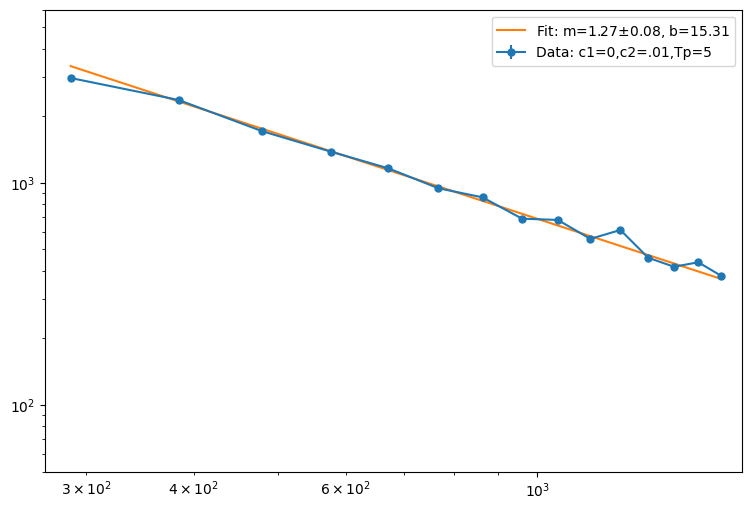

In [19]:
# 5/12, pp=ken_diff5_direct_mid_fc11
# c1=0, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(682, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,10,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0, .01)] = m
slopes_v2_err[(0, .01)] = err
intercepts_v2[(0, .01)] = b

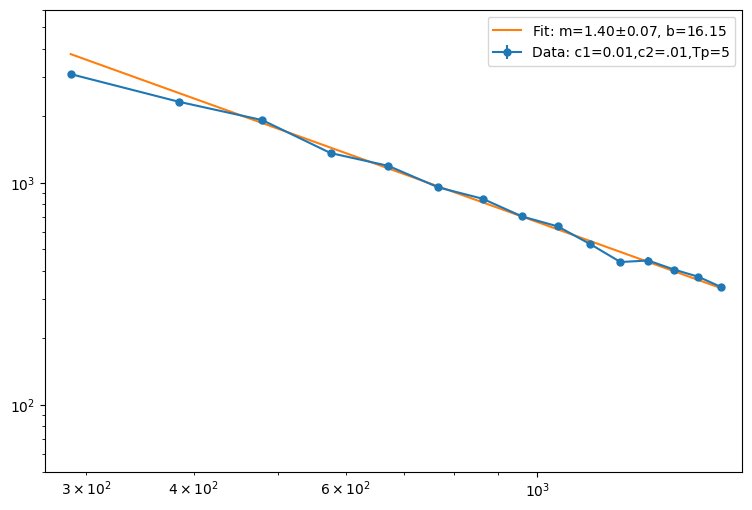

In [20]:
# 5/12, pp=ken_diff5_direct_mid_fc11
# c1=0.01, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(684, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.01,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.01, .01)] = m
slopes_v2_err[(0.01, .01)] = err
intercepts_v2[(0.01, .01)] = b

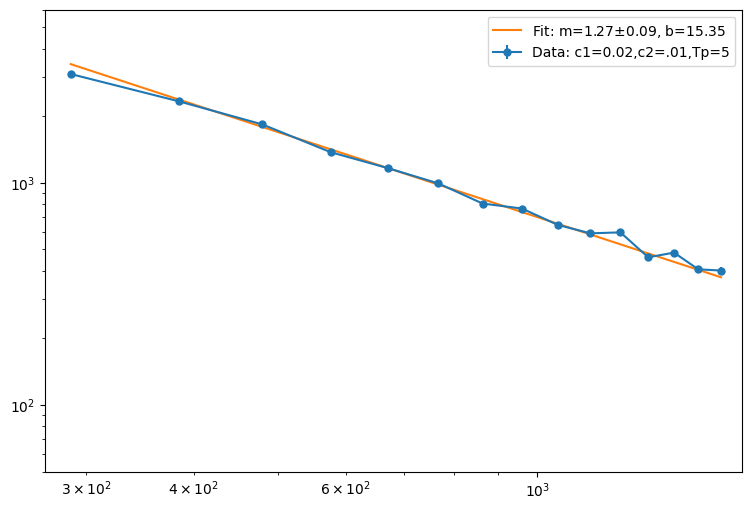

In [21]:
# 5/13, pp=ken_diff5_direct_mid_fc11
# c1=0.02, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(686, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,10,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.02,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.02, .01)] = m
slopes_v2_err[(0.02, .01)] = err
intercepts_v2[(0.02, .01)] = b

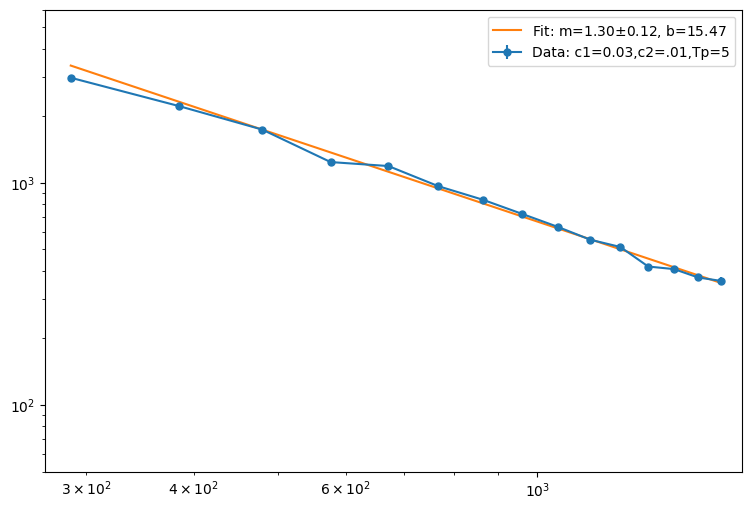

In [22]:
# 5/13, pp=ken_diff5_direct_mid_fc11
# c1=0.03, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(690, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.03,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.03, .01)] = m
slopes_v2_err[(0.03, .01)] = err
intercepts_v2[(0.03, .01)] = b


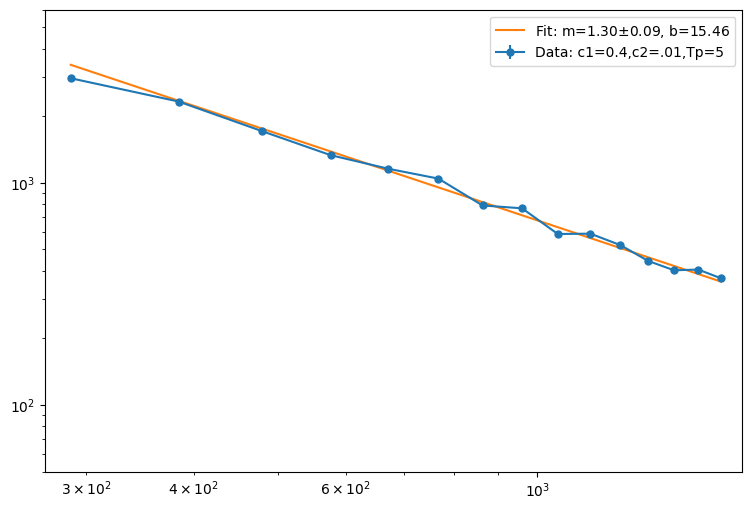

In [23]:
# 5/14, pp=ken_diff5_direct_mid_fc11
# c1=0.04, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(694, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,13,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.4,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.04, .01)] = m
slopes_v2_err[(0.04, .01)] = err
intercepts_v2[(0.04, .01)] = b

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


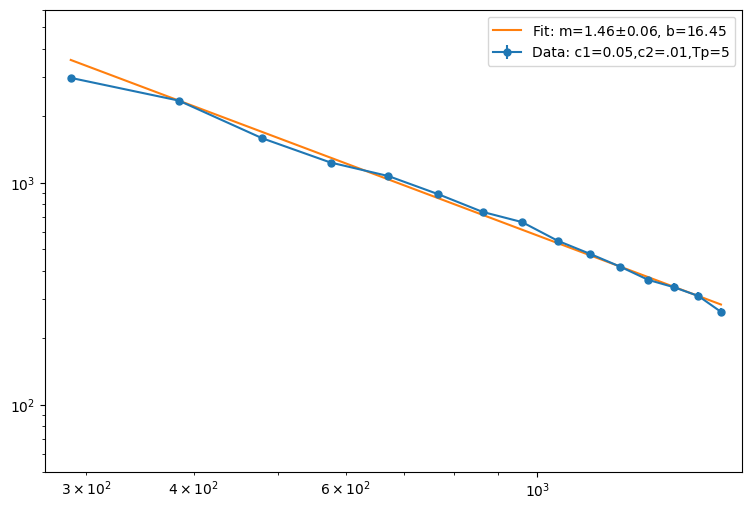

In [311]:
# 5/14, pp=ken_diff5_direct_mid_fc11
# c1=0.05, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(695, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.05,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.05, .01)] = m
slopes_v2_err[(0.05, .01)] = err
intercepts_v2[(0.05, .01)] = b

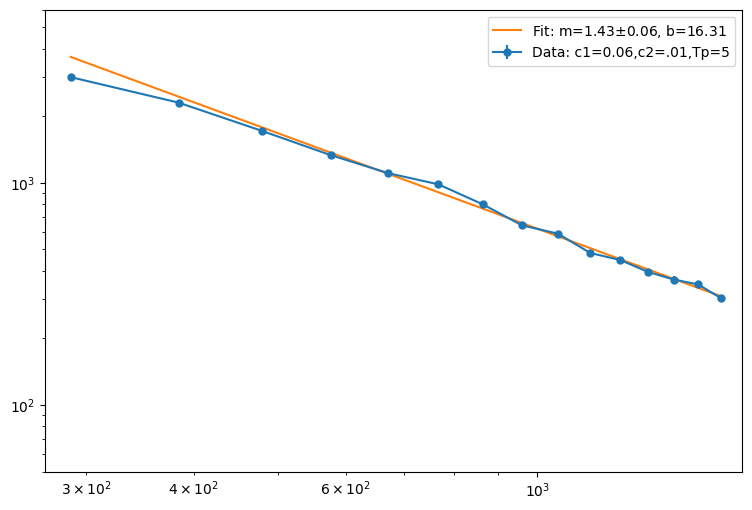

In [25]:
# 5/15, pp=ken_diff5_direct_mid_fc11
# c1=0.06, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(701, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.06,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.06, .01)] = m
slopes_v2_err[(0.06, .01)] = err
intercepts_v2[(0.06, .01)] = b

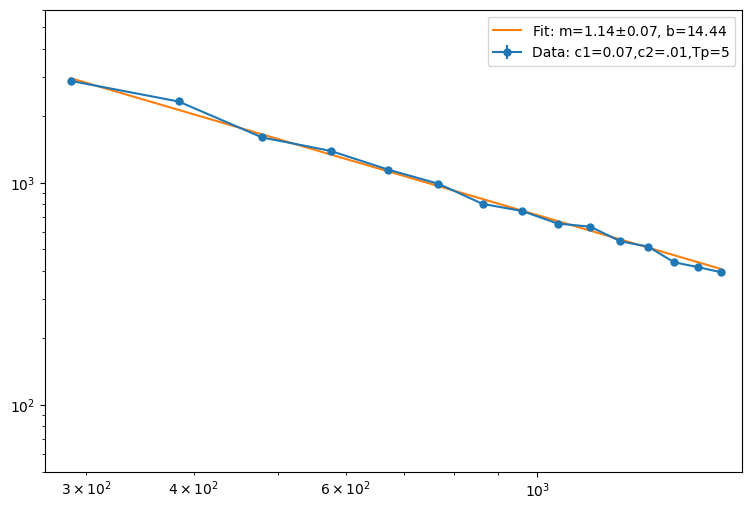

In [26]:
# 5/15, pp=ken_diff5_direct_mid_fc11
# c1=0.07, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(703, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.07,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.07, .01)] = m
slopes_v2_err[(0.07, .01)] = err
intercepts_v2[(0.07, .01)] = b

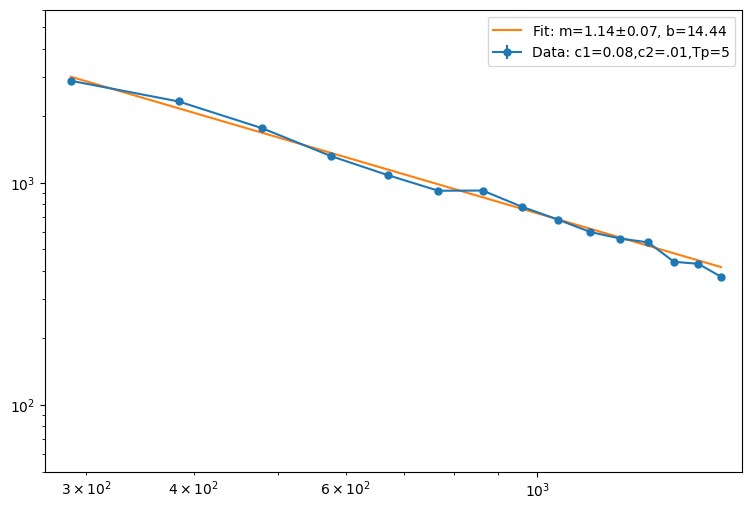

In [27]:
# 5/16, pp=ken_diff5_direct_mid_fc11
# c1=0.08, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(711, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.08,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.08, .01)] = m
slopes_v2_err[(0.08, .01)] = err
intercepts_v2[(0.08, .01)] = b

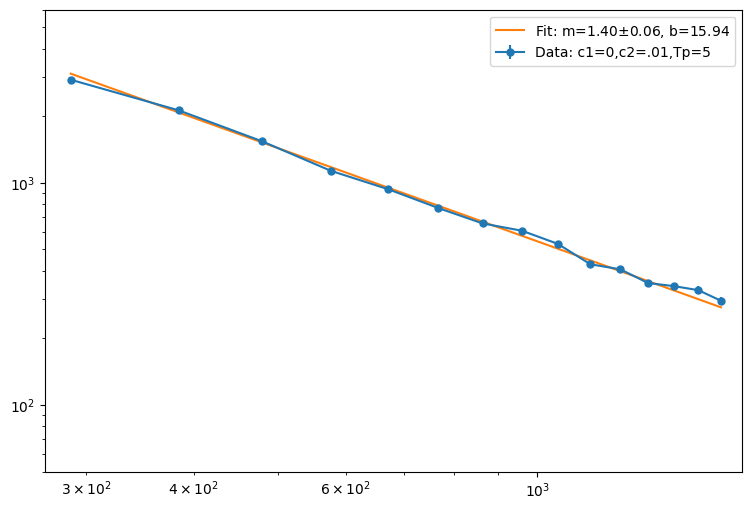

In [28]:
# 5/19, pp=ken_diff5_direct_mid_fc12
# c1=0, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(721, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.0, .01)] = m
slopes_v2_err[(0.0, .01)] = err
intercepts_v2[(0.0, .01)] = b

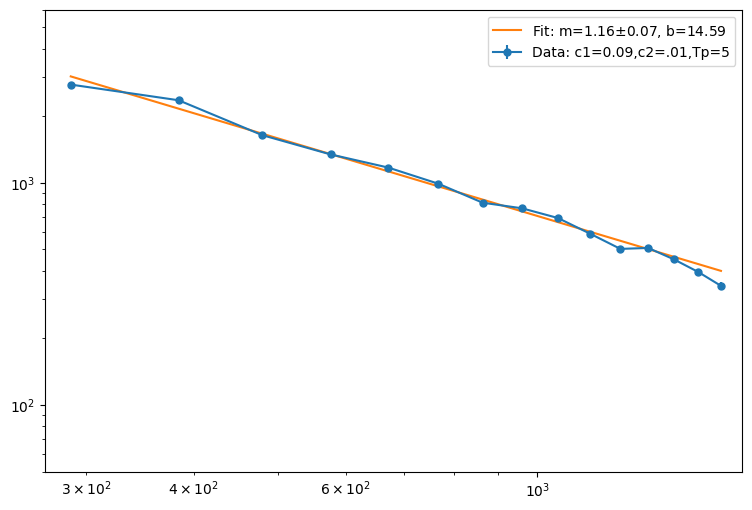

In [29]:
# 5/20, pp=ken_diff5_direct_mid_fc11
# c1=.09, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(728, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.09,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.09, .01)] = m
slopes_v2_err[(0.09, .01)] = err
intercepts_v2[(0.09, .01)] = b

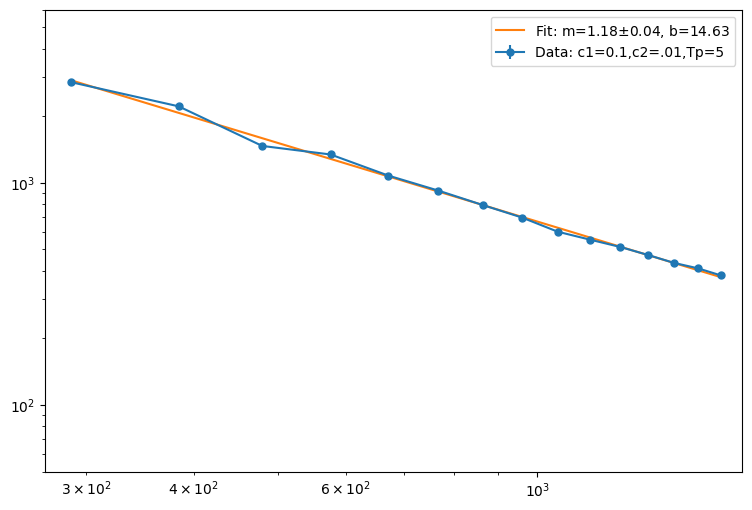

In [30]:
# 5/20, pp=ken_diff5_direct_mid_fc11
# c1=.1, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(730, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.1,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.1, .01)] = m
slopes_v2_err[(0.1, .01)] = err
intercepts_v2[(0.1, .01)] = b

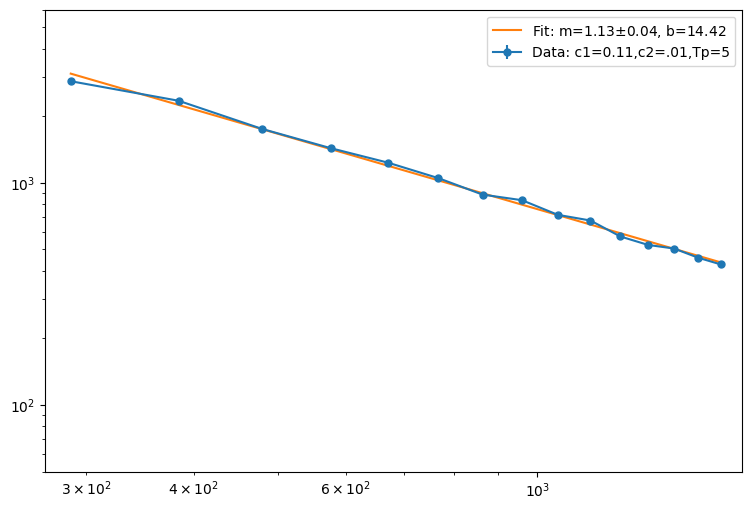

In [31]:
# 5/21, pp=ken_diff5_direct_mid_fc11
# c1=.11, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(734, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.11,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.11, .01)] = m
slopes_v2_err[(0.11, .01)] = err
intercepts_v2[(0.11, .01)] = b

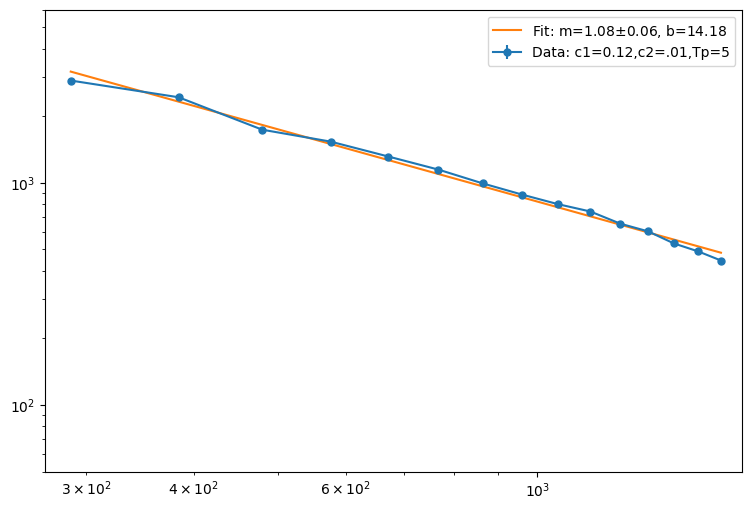

In [32]:
# 5/21, pp=ken_diff5_direct_mid_fc11
# c1=.12, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(735, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.12,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.12, .01)] = m
slopes_v2_err[(0.12, .01)] = err
intercepts_v2[(0.12, .01)] = b

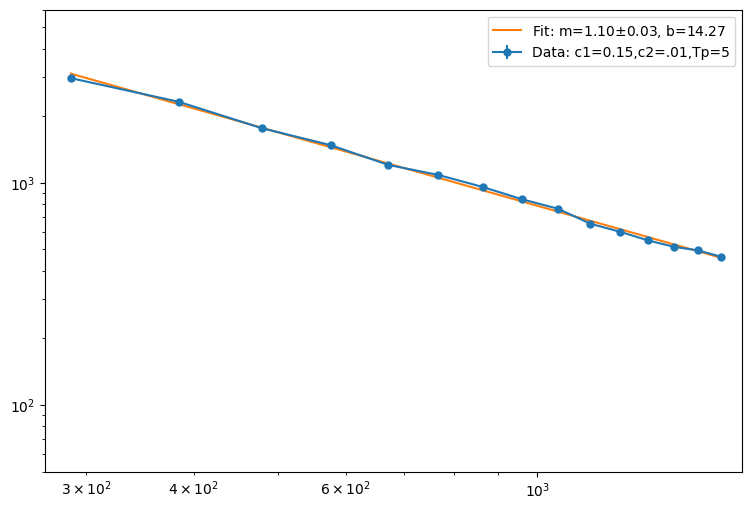

In [33]:
# 5/22, pp=ken_diff5_direct_mid_fc11
# c1=.15, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(740, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.15,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.15, .01)] = m
slopes_v2_err[(0.15, .01)] = err
intercepts_v2[(0.15, .01)] = b

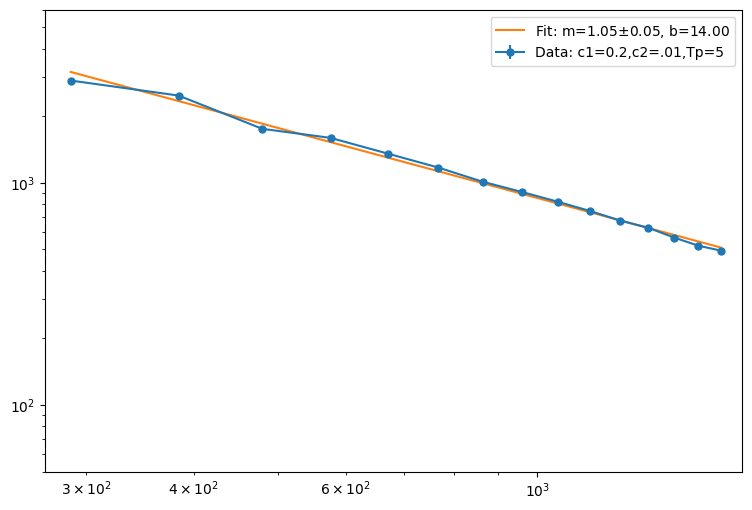

In [34]:
# 5/22, pp=ken_diff5_direct_mid_fc11
# c1=.2, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(741, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.2,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.2, .01)] = m
slopes_v2_err[(0.2, .01)] = err
intercepts_v2[(0.2, .01)] = b

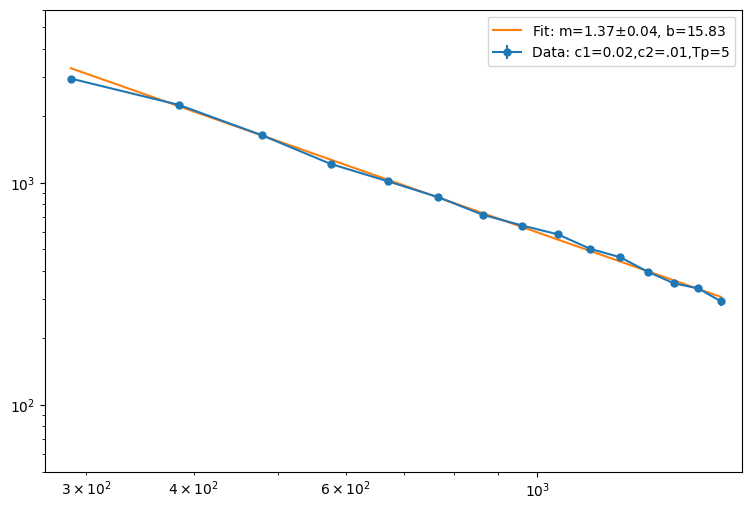

In [35]:
# 5/23, pp=ken_diff5_direct_mid_fc11
# c1=.02, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(746, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.02,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.02, .01)] = m
slopes_v2_err[(0.02, .01)] = err
intercepts_v2[(0.02, .01)] = b

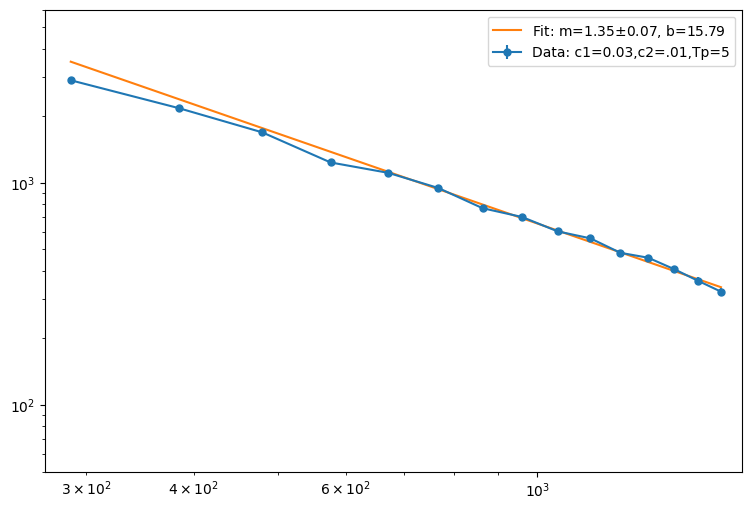

In [36]:
# 5/27, pp=ken_diff5_direct_mid_fc11
# c1=.03, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(752, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,4,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.03,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.03, .01)] = m
slopes_v2_err[(0.03, .01)] = err
intercepts_v2[(0.03, .01)] = b

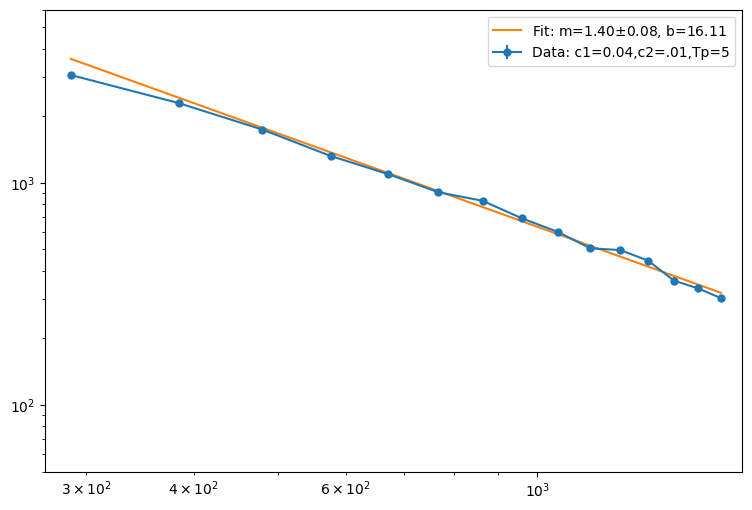

In [37]:
# 5/27, pp=ken_diff5_direct_mid_fc11
# c1=.04, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(753, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.04,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.04, .01)] = m
slopes_v2_err[(0.04, .01)] = err
intercepts_v2[(0.04, .01)] = b

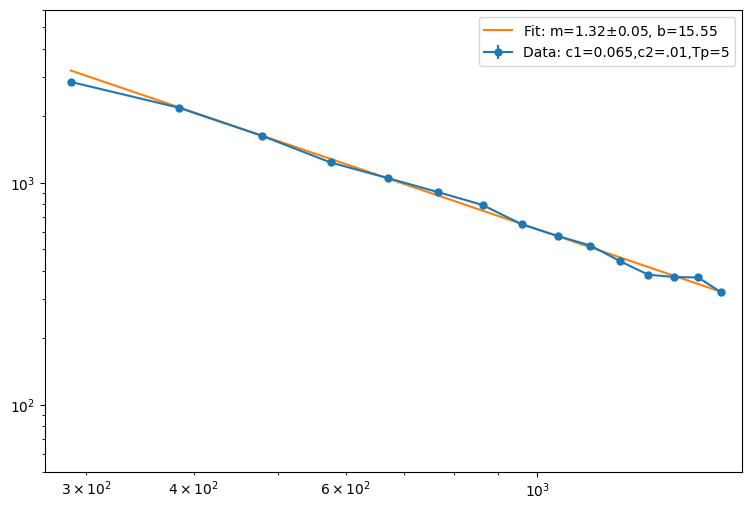

In [38]:
# 5/28, pp=ken_diff5_direct_mid_fc11
# c1=.065, c2=.01
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(758, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.065,c2=.01,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.065, .01)] = m
slopes_v2_err[(0.065, .01)] = err
intercepts_v2[(0.065, .01)] = b

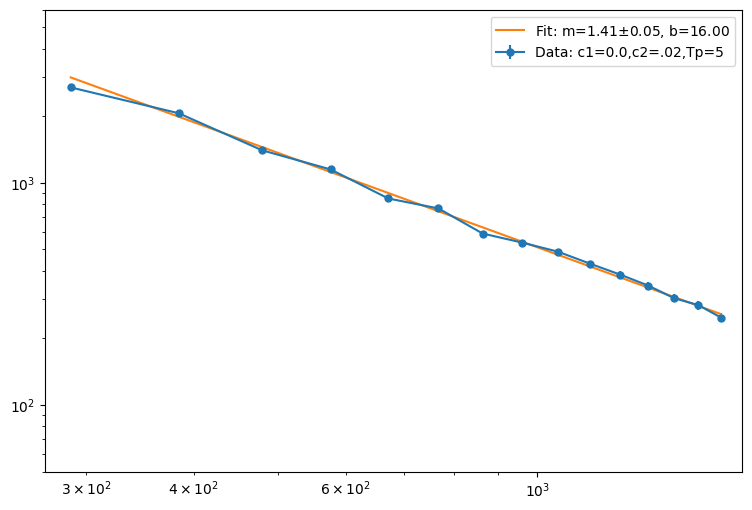

In [57]:
# 5/29, pp=ken_diff5_direct_mid_fc11
# c1=.00, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(762, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.0, .02)] = m
slopes_v2_err[(0.0, .02)] = err
intercepts_v2[(0.0, .02)] = b

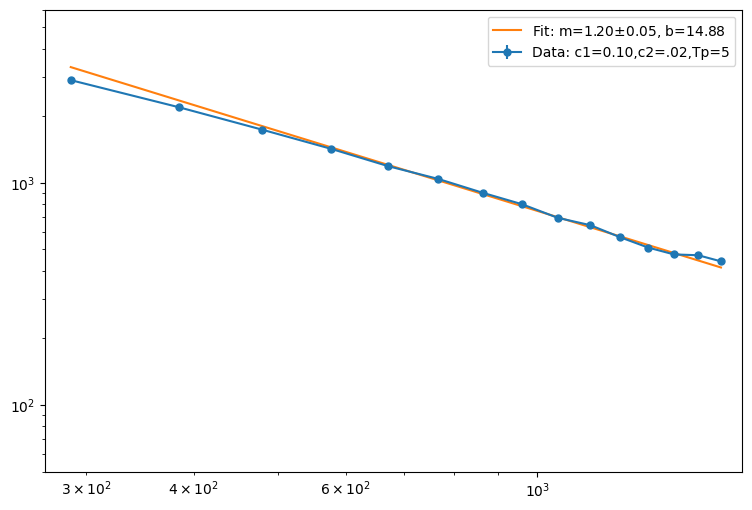

In [40]:
# 5/30, pp=ken_diff5_direct_mid_fc11
# c1=.10, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(768, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,3,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.10,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
#slopes_v2[(0.10, .02)] = m
#slopes_v2_err[(0.10, .02)] = err
#intercepts_v2[(0.10, .02)] = b

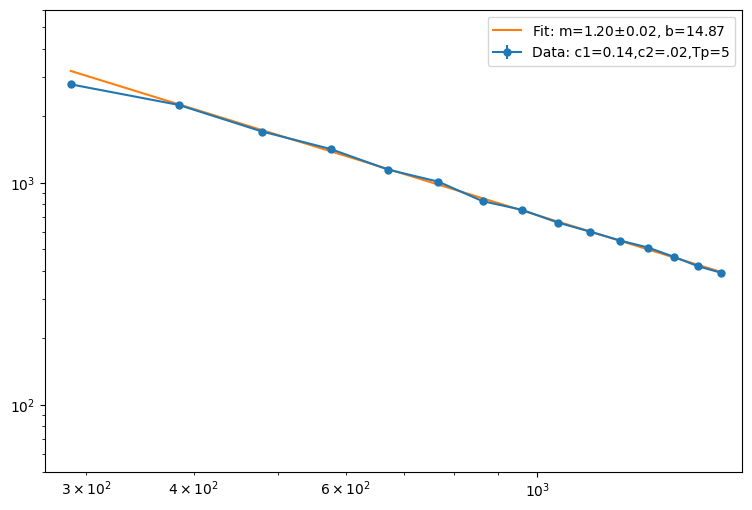

In [41]:
# 5/30, pp=ken_diff5_direct_mid_fc11
# c1=.14, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(769, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.14,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.14, .02)] = m
slopes_v2_err[(0.14, .02)] = err
intercepts_v2[(0.14, .02)] = b

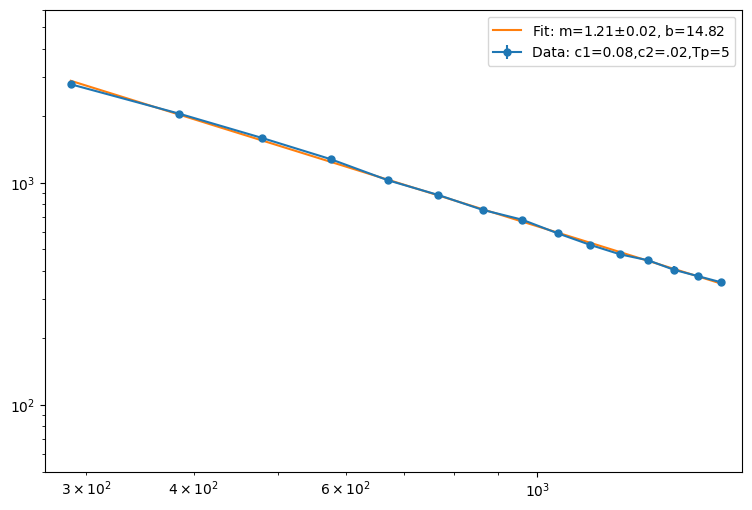

In [42]:
# 6/2, pp=ken_diff5_direct_mid_fc12
# c1=.08, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(775, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.08,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
#slopes_v2[(0.08, .02)] = m
#slopes_v2_err[(0.08, .02)] = err
#intercepts_v2[(0.08, .02)] = b

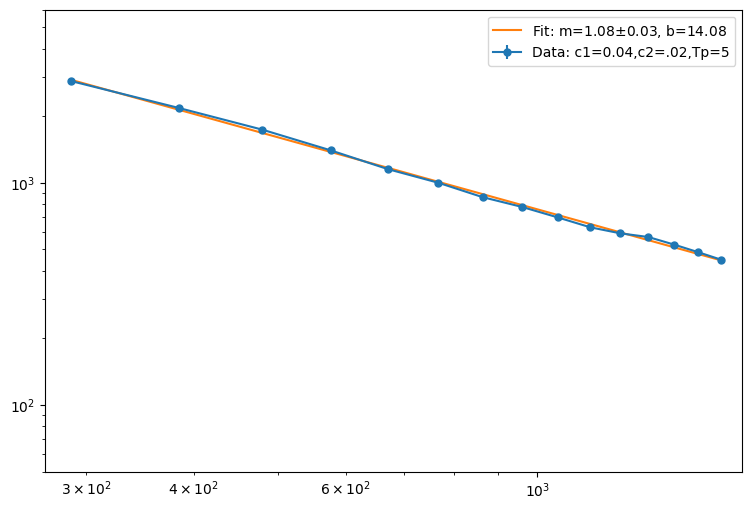

In [43]:
# 6/3, pp=ken_diff5_direct_mid_fc12
# c1=.04, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(783, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.04,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.04, .02)] = m
slopes_v2_err[(0.04, .02)] = err
intercepts_v2[(0.04, .02)] = b

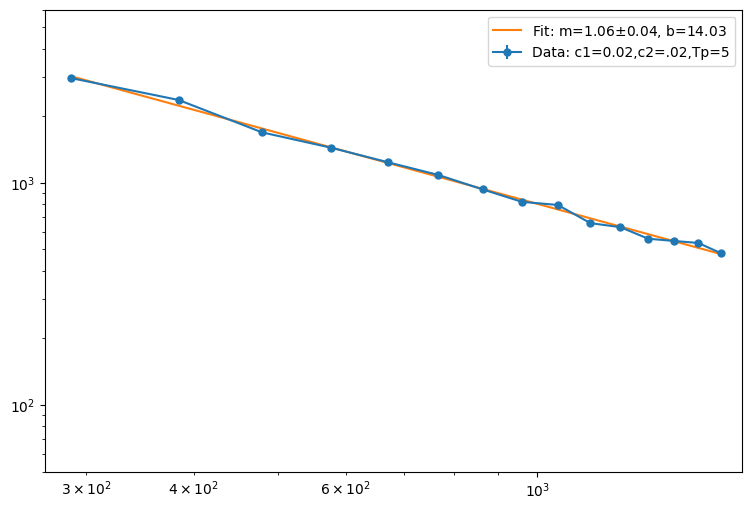

In [44]:
# 6/3, pp=ken_diff5_direct_mid_fc12
# c1=.02, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(784, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.02,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
#slopes_v2[(0.02, .02)] = m
#slopes_v2_err[(0.02, .02)] = err
#intercepts_v2[(0.02, .02)] = b

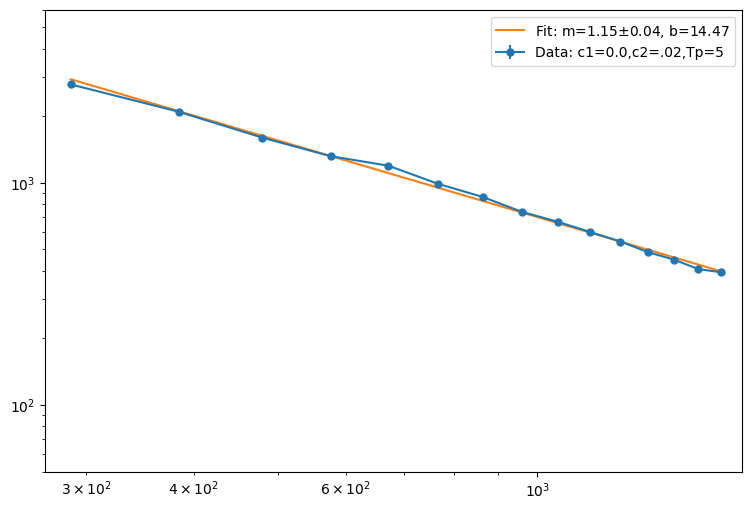

In [45]:
# 6/4, pp=ken_diff5_direct_mid_fc12
# c1=.0, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(790, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
#slopes_v2[(0.0, .02)] = m
#slopes_v2_err[(0.0, .02)] = err
#intercepts_v2[(0.0, .02)] = b

In [46]:
###
### The above c2=.02 data was garbage, so we will try again. The hardware crashed during the last run, so maybe it was just a bad time.
###

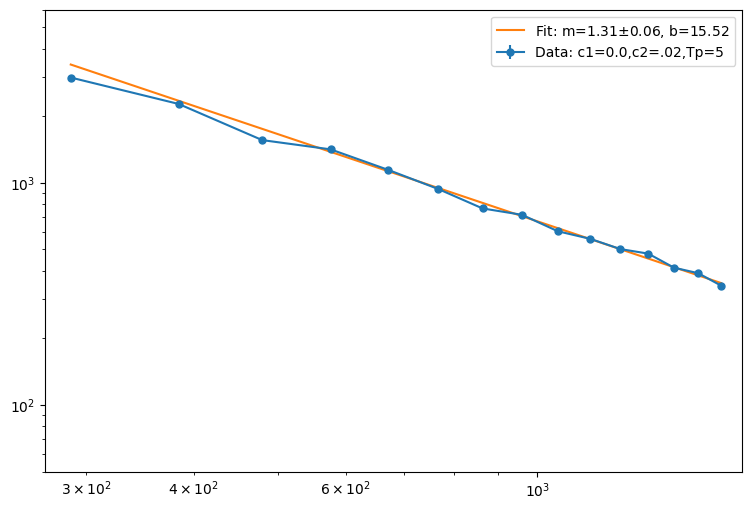

In [47]:
# 6/5, pp=ken_diff5_direct_mid_fc11
# c1=.0, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(796, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,3,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.0, .02)] = m
slopes_v2_err[(0.0, .02)] = err
intercepts_v2[(0.0, .02)] = b

In [48]:
#
# hardware crashed again. Need full restart of all components.
#

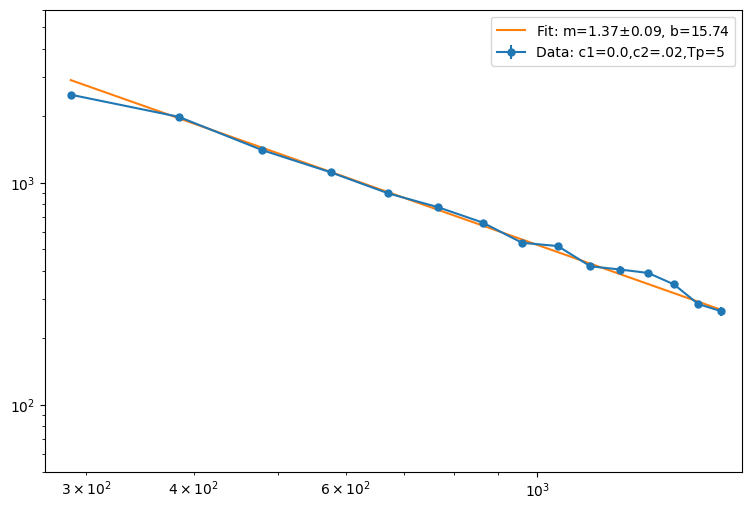

In [49]:
# 6/6, pp=ken_diff5_direct_mid_fc11
# c1=.0, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
# trying again after full restart
expt = nmr.Experiment(805, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,8,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
#slopes_v2[(0.0, .02)] = m
#slopes_v2_err[(0.0, .02)] = err
#intercepts_v2[(0.0, .02)] = b

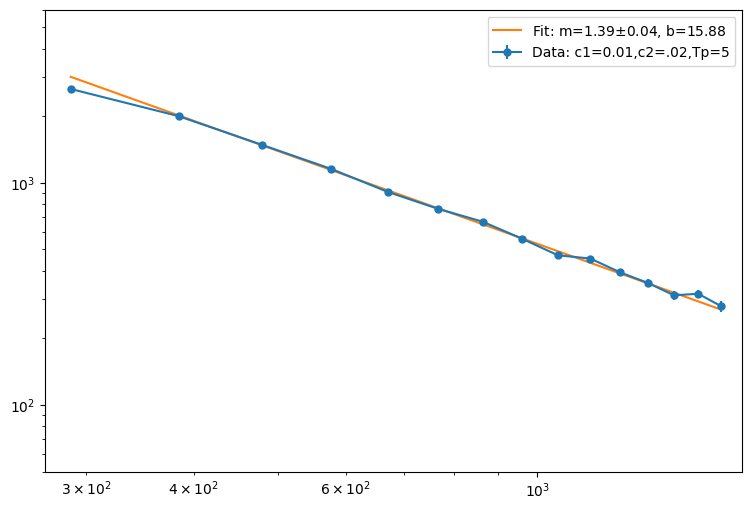

In [50]:
# 6/6, pp=ken_diff5_direct_mid_fc11
# c1=.01, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(806, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,13,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.01,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.01, .02)] = m
slopes_v2_err[(0.01, .02)] = err
intercepts_v2[(0.01, .02)] = b

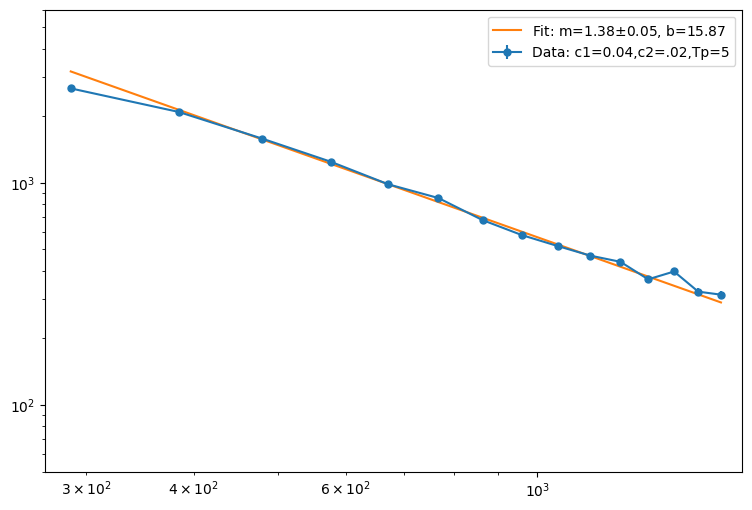

In [51]:
# 6/9, pp=ken_diff5_direct_mid_fc11
# c1=.04, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(811, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,12,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.04,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.04, .02)] = m
slopes_v2_err[(0.04, .02)] = err
intercepts_v2[(0.04, .02)] = b

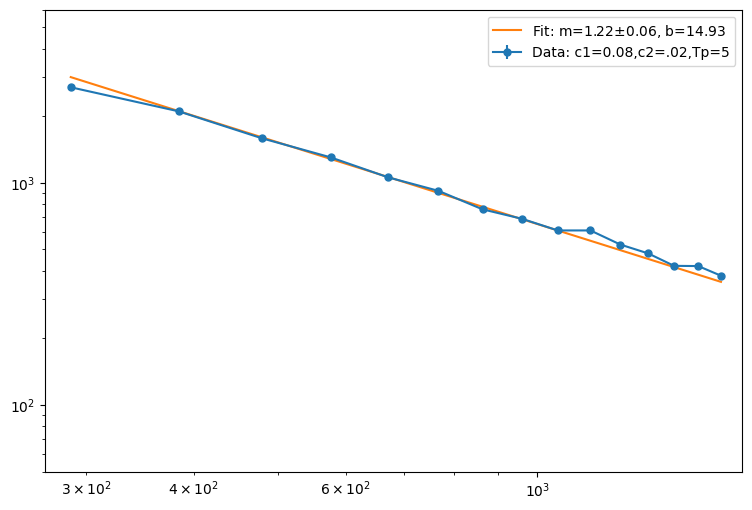

In [52]:
# 6/9, pp=ken_diff5_direct_mid_fc11
# c1=.08, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(812, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,8,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.08,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
#slopes_v2[(0.08, .02)] = m
#slopes_v2_err[(0.08, .02)] = err
#intercepts_v2[(0.08, .02)] = b

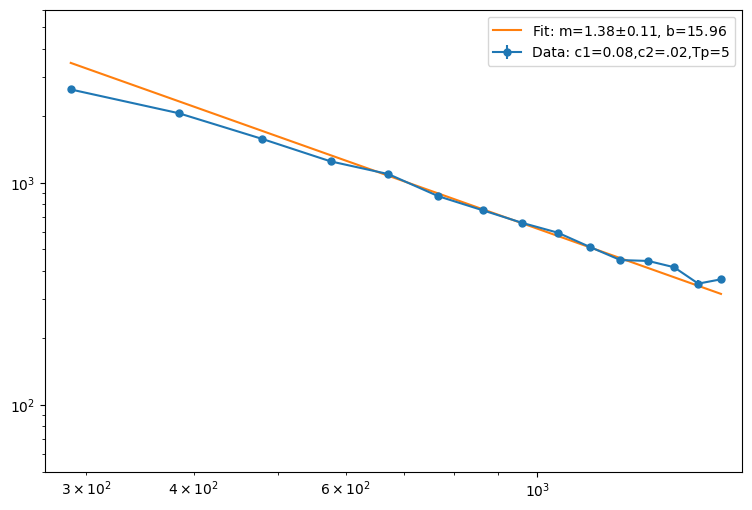

In [66]:
# 6/10, pp=ken_diff5_direct_mid_fc11
# c1=.08, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
# maybe it will be better this time
expt = nmr.Experiment(816, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,4,11,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.08,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.08, .02)] = m
slopes_v2_err[(0.08, .02)] = err
intercepts_v2[(0.08, .02)] = b

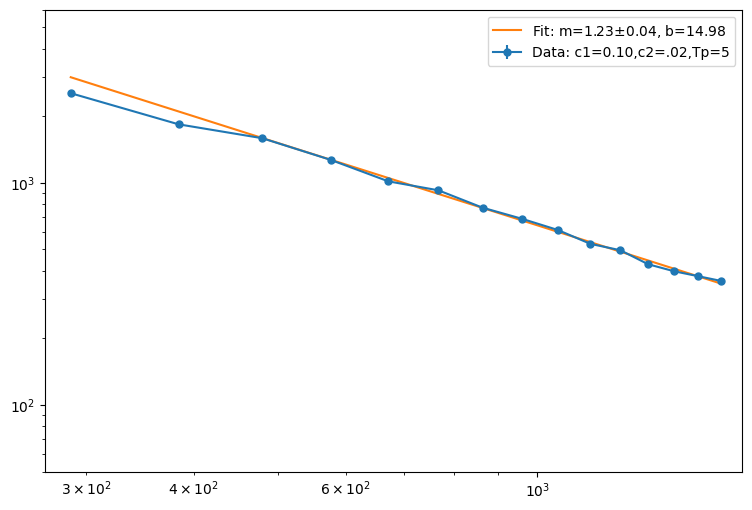

In [68]:
# 6/10, pp=ken_diff5_direct_mid_fc11
# c1=.10, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
# maybe it will be better this time
expt = nmr.Experiment(817, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.10,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.10, .02)] = m
slopes_v2_err[(0.10, .02)] = err
intercepts_v2[(0.10, .02)] = b

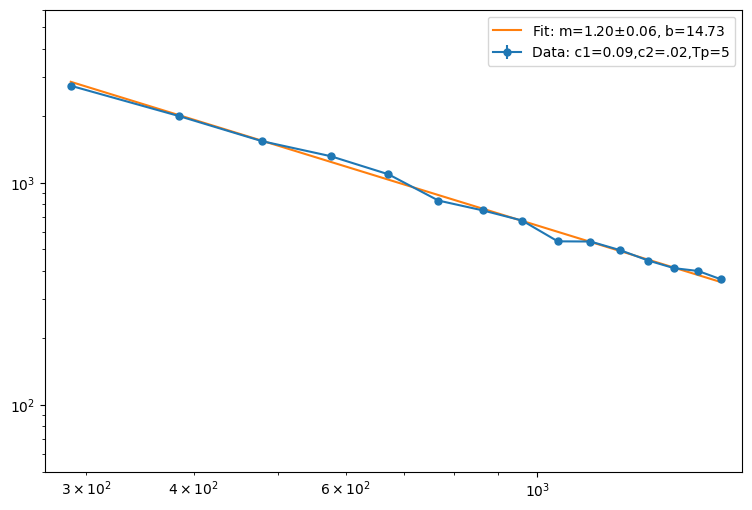

In [85]:
# 6/11, pp=ken_diff5_direct_mid_fc11
# c1=.09, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
# maybe it will be better this time
expt = nmr.Experiment(822, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,1,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.09,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.09, .02)] = m
slopes_v2_err[(0.09, .02)] = err
intercepts_v2[(0.09, .02)] = b

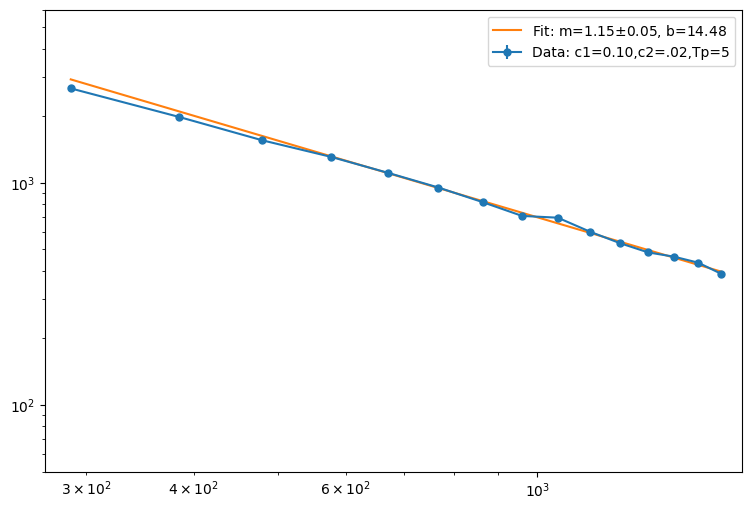

In [86]:
# 6/11, pp=ken_diff5_direct_mid_fc11
# c1=.10, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
# maybe it will be better this time
expt = nmr.Experiment(823, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,3,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.10,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.10, .02)] = m
slopes_v2_err[(0.10, .02)] = err
intercepts_v2[(0.10, .02)] = b

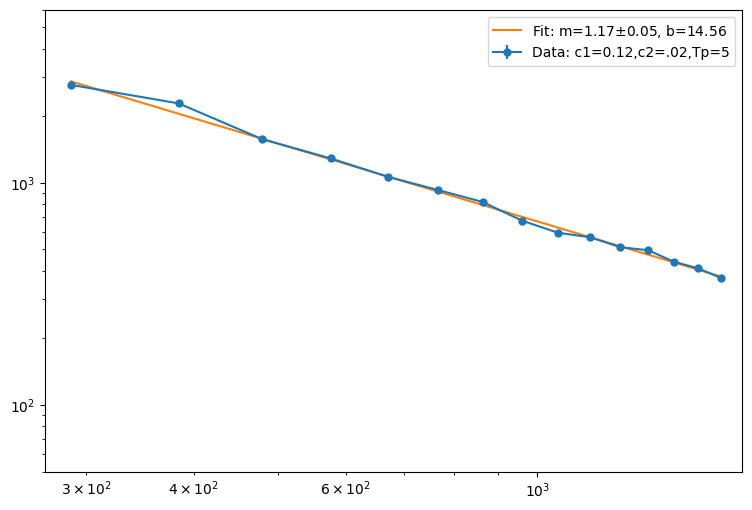

In [90]:
# 6/12, pp=ken_diff5_direct_mid_fc11
# c1=.12, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
# maybe it will be better this time
expt = nmr.Experiment(831, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.12,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.12, .02)] = m
slopes_v2_err[(0.12, .02)] = err
intercepts_v2[(0.12, .02)] = b

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


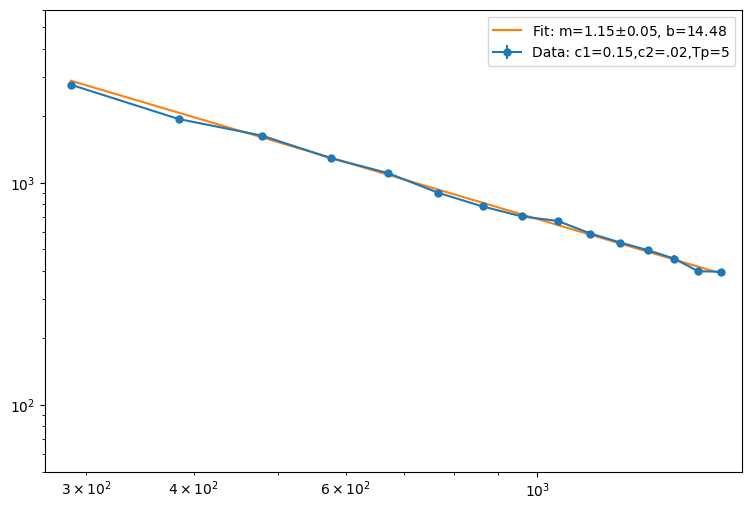

In [300]:
# 6/16, pp=ken_diff5_direct_mid_fc11
# c1=.15, c2=.02
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(837, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.15,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.15, .02)] = m
slopes_v2_err[(0.15, .02)] = err
intercepts_v2[(0.15, .02)] = b

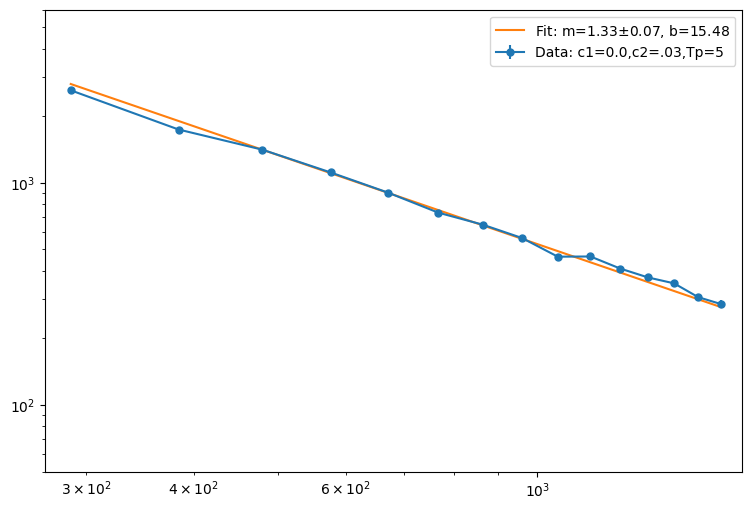

In [314]:
# 6/17, pp=ken_diff5_direct_mid_fc11
# c1=.00, c2=.03
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(842, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,2,8,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.03,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.0, .03)] = m
slopes_v2_err[(0.0, .03)] = err
intercepts_v2[(0.0, .03)] = b

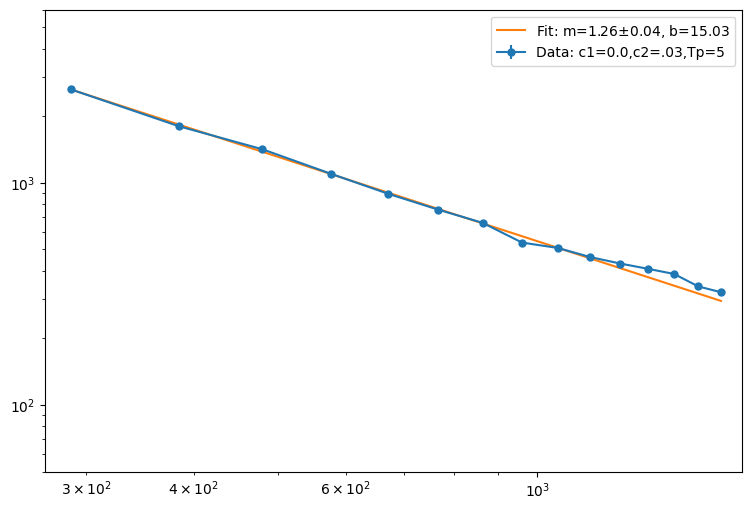

In [316]:
# 6/17, pp=ken_diff5_direct_mid_fc11
# c1=.01, c2=.03
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(843, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,7,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.03,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.01, .03)] = m
slopes_v2_err[(0.01, .03)] = err
intercepts_v2[(0.01, .03)] = b

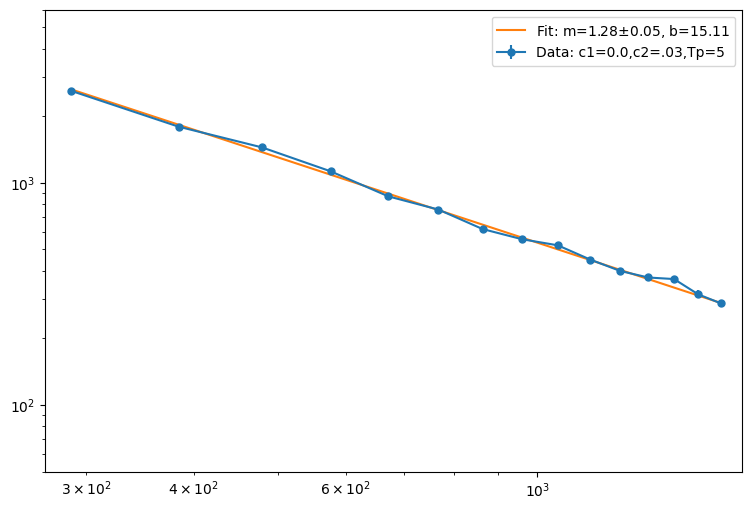

In [318]:
# 6/18, pp=ken_diff5_direct_mid_fc11
# c1=.00, c2=.03
# T0 = 3, Tf=18
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(850, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,11,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.03,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 18*T)
plt.ylim(5e1,6e3)
plt.show()
slopes_v2[(0.0, .03)] = m
slopes_v2_err[(0.0, .03)] = err
intercepts_v2[(0.0, .03)] = b

In [319]:
# Organize slopes_v2 data into separate arrays based on unique values of key[1]
unique_c2_values = sorted(set(key[1] for key in slopes_v2.keys()))
slopes_by_c2 = {c2: [] for c2 in unique_c2_values}
errors_by_c2 = {c2: [] for c2 in unique_c2_values}
disorder_by_c2 = {c2: [] for c2 in unique_c2_values}

offset =.003 # Offset for disorder strength calculation
rescale = .0
homo = 5.25
for key, slope in slopes_v2.items():
    c1, c2 = key
    disorder_strength = (1/3)*c1/(c2+.015)
    slopes_by_c2[c2].append(slope)
    errors_by_c2[c2].append(slopes_v2_err[key])
    disorder_by_c2[c2].append(disorder_strength)

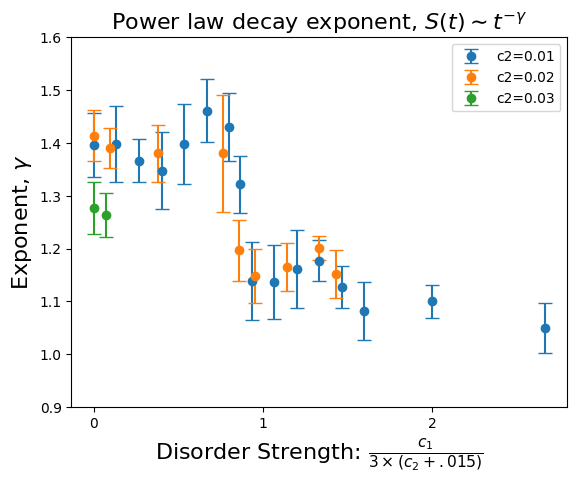

In [ ]:
disorder = np.arange(0, 8, 0.1)

plt.errorbar(disorder_by_c2[0.01], slopes_by_c2[0.01], yerr=errors_by_c2[0.01], fmt='o', capsize=5, label="c2=0.01")
plt.errorbar(disorder_by_c2[0.02], slopes_by_c2[0.02], yerr=errors_by_c2[0.02], fmt='o', capsize=5, label="c2=0.02")
plt.errorbar(disorder_by_c2[0.03], slopes_by_c2[0.03], yerr=errors_by_c2[0.03], fmt='o', capsize=5, label="c2=0.03")
plt.xlabel(r"Disorder Strength: $\frac{c_1}{3\times(c_2+.015)}$", fontsize=16)
plt.ylabel(r"Exponent, $\gamma$", fontsize=16)
plt.title(r"Power law decay exponent, $S(t) \sim t^{-\gamma}$", fontsize=16)
plt.ylim(.9, 1.6)
#plt.plot(disorder, 0.14 * (1 - np.tanh(3.5 * (disorder - 2.6))) + 1.12, label="Tanh Overlay", linestyle='--', color='black')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

In [487]:
# Organize slopes_v2 data into separate arrays based on unique values of key[1]
unique_c2_values = sorted(set(key[1] for key in slopes_v2.keys()))
slopes_by_c2 = {c2: [] for c2 in unique_c2_values}
errors_by_c2 = {c2: [] for c2 in unique_c2_values}
disorder_by_c2 = {c2: [] for c2 in unique_c2_values}

offset =.0095 # Offset for disorder strength calculation
homo = 0.0
for key, slope in slopes_v2.items():
    c1, c2 = key
    disorder_strength = (c1 + homo) / (c2+offset)
    slopes_by_c2[c2].append(slope)
    errors_by_c2[c2].append(slopes_v2_err[key])
    disorder_by_c2[c2].append(disorder_strength)

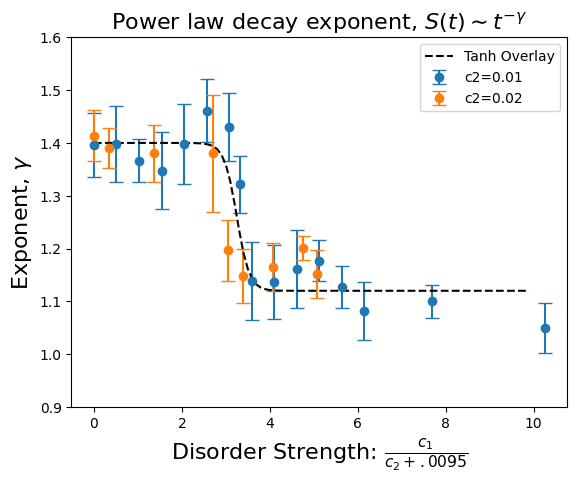

In [490]:
disorder = np.arange(0, 10, 0.1)

plt.errorbar(disorder_by_c2[0.01], slopes_by_c2[0.01], yerr=errors_by_c2[0.01], fmt='o', capsize=5, label="c2=0.01")
plt.errorbar(np.array(disorder_by_c2[0.02]), slopes_by_c2[0.02], yerr=errors_by_c2[0.02], fmt='o', capsize=5, label="c2=0.02")
plt.xlabel(r"Disorder Strength: $\frac{c_1}{c_2+.0095}$", fontsize=16)
plt.ylabel(r"Exponent, $\gamma$", fontsize=16)
plt.title(r"Power law decay exponent, $S(t) \sim t^{-\gamma}$", fontsize=16)
plt.ylim(.9, 1.6)
plt.plot(disorder, 0.14 * (1 - np.tanh(3.5 * (disorder - 3.25))) + 1.12, label="Tanh Overlay", linestyle='--', color='black')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

C:\Users\awsta\AppData\Local\Temp\ipykernel_15400\309190280.py:7: RuntimeWarning: invalid value encountered in sqrt
  D = np.where(disorder_param <= 1, (.5/(disorder_param+.5))*np.sqrt(1-disorder_param**2 ), 0)


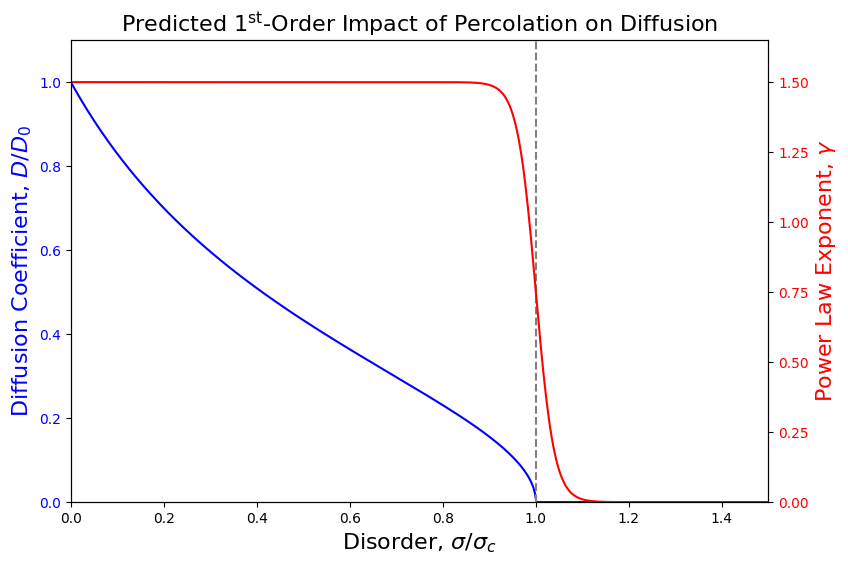

In [55]:
fig, ax1 = plt.subplots(figsize=(9, 6))

# Define the disorder parameter range
disorder_param = np.linspace(0, 1.5, 500)

# Diffusion coefficient, D
D = np.where(disorder_param <= 1, (.5/(disorder_param+.5))*np.sqrt(1-disorder_param**2 ), 0)

# Power law exponent, γ
gamma = 0.75 * (1 - np.tanh(25 * (disorder_param - 1)))

# Plot diffusion coefficient
ax1.plot(disorder_param, D, label=r"$D(\sigma)$", color="blue")
ax1.set_xlabel(r"Disorder, $\sigma/\sigma_c$", fontsize=16)
ax1.set_ylabel(r"Diffusion Coefficient, $D/D_0$", color="blue", fontsize=16)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, 1.1)

# Create a second y-axis for the power law exponent
ax2 = ax1.twinx()
ax2.plot(disorder_param, gamma, color="red", label=r"$\gamma(\sigma)$")
ax2.set_ylabel(r"Power Law Exponent, $\gamma$", color="red", fontsize=16)
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, 1.65)
plt.xlim(0,1.5)
#ax1.yaxis.set_major_locator(plt.MultipleLocator(0.25))
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.25))
ax1.axvline(x=1, color="gray", linestyle="--", label=r"$\sigma_c$")



plt.title(r"Predicted $1^{\text{st}}$-Order Impact of Percolation on Diffusion", fontsize=16)
plt.show()

In [468]:
fids = {}
err_data = {}

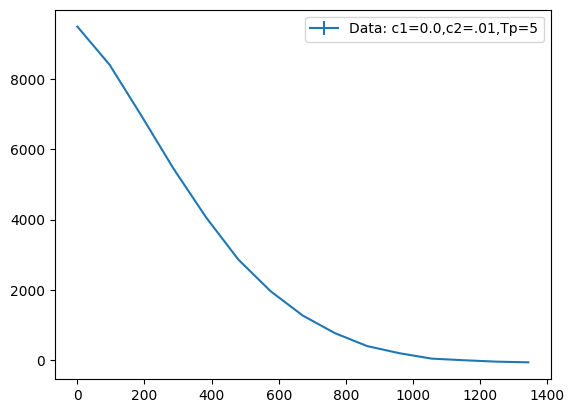

In [476]:
# 6/20, pp=ken_fid_test_fc11
# c1=.00, c2=.01
# T0 = 0, Tf=15
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(858, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(0*T, 15*T,T)

fids[(0.0, .01)] = data
err_data[(0.0, .01)] = errs

plt.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.01,Tp=5")
plt.legend()
plt.show()

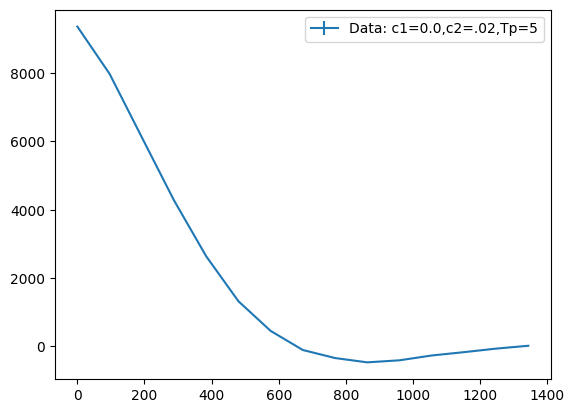

In [477]:
# 6/23, pp=ken_fid_test_fc10
# c1=.00, c2=.02
# T0 = 0, Tf=15
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(863, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(0*T, 15*T,T)
fids[(0.0, .02)] = data
err_data[(0.0, .02)] = errs
plt.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.02,Tp=5")
plt.legend()
plt.show()

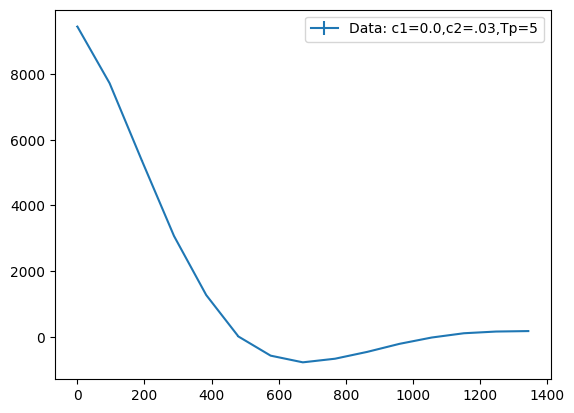

In [478]:
# 6/23, pp=ken_fid_test_fc10
# c1=.00, c2=.03
# T0 = 0, Tf=15
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(865, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(0*T, 15*T,T)
fids[(0.0, .03)] = data
err_data[(0.0, .03)] = errs
plt.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.03,Tp=5")
plt.legend()
plt.show()

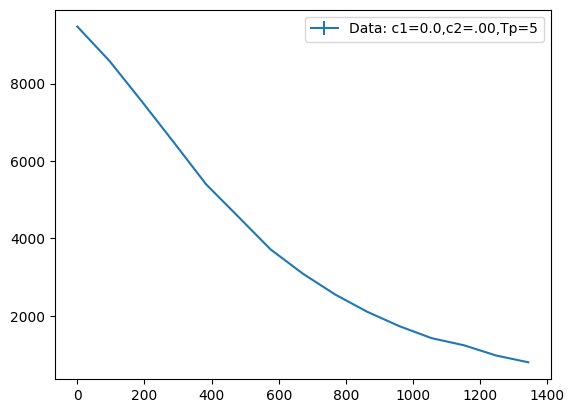

In [479]:
# 6/23, pp=ken_fid_test_fc10
# c1=.00, c2=.00
# T0 = 0, Tf=15
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(870, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(0*T, 15*T,T)
fids[(0.0, .00)] = data
err_data[(0.0, .00)] = errs
plt.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.00,Tp=5")
plt.legend()
plt.show()

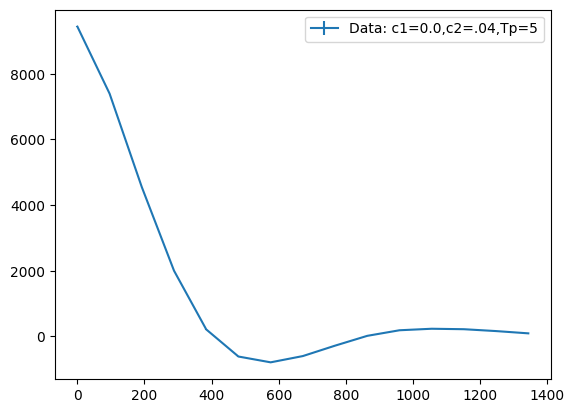

In [480]:
# 6/23, pp=ken_fid_test_fc10
# c1=.00, c2=.04
# T0 = 0, Tf=15
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(871, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(0*T, 15*T,T)
fids[(0.0, .04)] = data
err_data[(0.0, .04)] = errs
plt.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.04,Tp=5")
plt.legend()
plt.show()

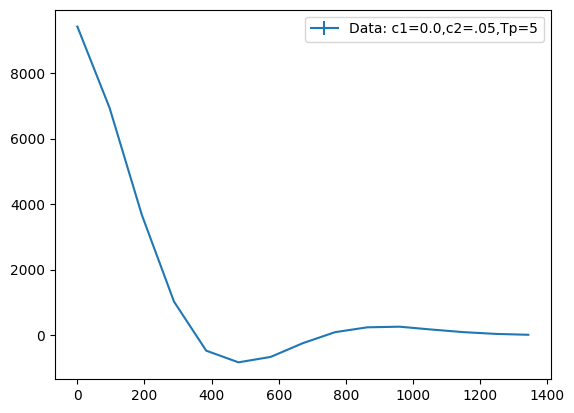

In [481]:
# 6/23, pp=ken_fid_test_fc10
# c1=.00, c2=.05
# T0 = 0, Tf=15
# 5 prep cycles
# no solid echo
expt = nmr.Experiment(872, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=True)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(0*T, 15*T,T)
fids[(0.0, .05)] = data
err_data[(0.0, .05)] = errs
plt.errorbar(times,data,errs,label=f"Data: c1=0.0,c2=.05,Tp=5")
plt.legend()
plt.show()

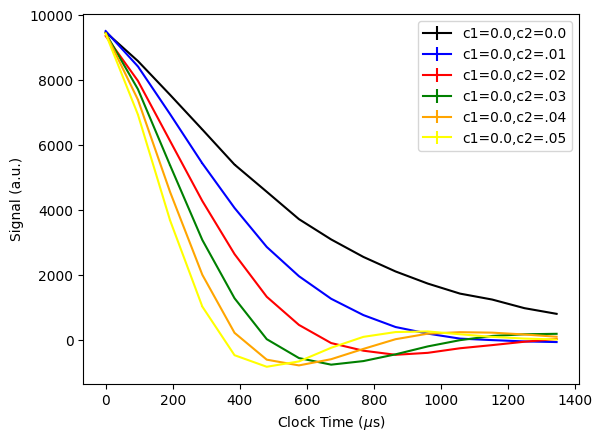

In [482]:
plt.errorbar(times, fids[(0.0, .0)], err_data[(0.0,0.0)], label="c1=0.0,c2=0.0", color="black")
plt.errorbar(times, fids[(0.0, .01)], err_data[(0.0,0.01)], label="c1=0.0,c2=.01", color="blue")
plt.errorbar(times, fids[(0.0, .02)], err_data[(0.0,0.02)], label="c1=0.0,c2=.02", color="red")
plt.errorbar(times, fids[(0.0, .03)], err_data[(0.0,0.03)], label="c1=0.0,c2=.03", color="green")
plt.errorbar(times, fids[(0.0, .04)], err_data[(0.0,0.04)], label="c1=0.0,c2=.04", color="orange")
plt.errorbar(times, fids[(0.0, .05)], err_data[(0.0,0.05)], label="c1=0.0,c2=.05", color="yellow")
plt.legend()
plt.xlabel(rf"Clock Time ($\mu$s)")
plt.ylabel(r"Signal (a.u.)")
plt.show()

In [489]:
fids[(0.0, .01)]

array([9505., 8417., 6945., 5431., 4058., 2857., 1956., 1261.,  759.,
        391.,  188.,   34.,  -12.,  -52.,  -72.])

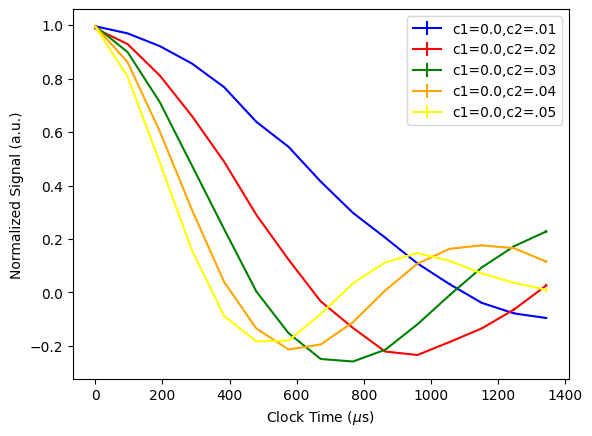

In [444]:
plt.errorbar(times, fids[(0.0, .01)]/fids[(0.0, .0)], err_data[(0.0,0.01)]/fids[(0.0, .0)], label="c1=0.0,c2=.01", color="blue")
plt.errorbar(times, fids[(0.0, .02)]/fids[(0.0, .0)], err_data[(0.0,0.02)]/fids[(0.0, .0)], label="c1=0.0,c2=.02", color="red")
plt.errorbar(times, fids[(0.0, .03)]/fids[(0.0, .0)], err_data[(0.0,0.03)]/fids[(0.0, .0)], label="c1=0.0,c2=.03", color="green")
plt.errorbar(times, fids[(0.0, .04)]/fids[(0.0, .0)], err_data[(0.0,0.04)]/fids[(0.0, .0)], label="c1=0.0,c2=.04", color="orange")
plt.errorbar(times, fids[(0.0, .05)]/fids[(0.0, .0)], err_data[(0.0,0.05)]/fids[(0.0, .0)], label="c1=0.0,c2=.05", color="yellow")
plt.legend()
plt.xlabel(rf"Clock Time ($\mu$s)")
plt.ylabel(r"Normalized Signal (a.u.)")
plt.show()

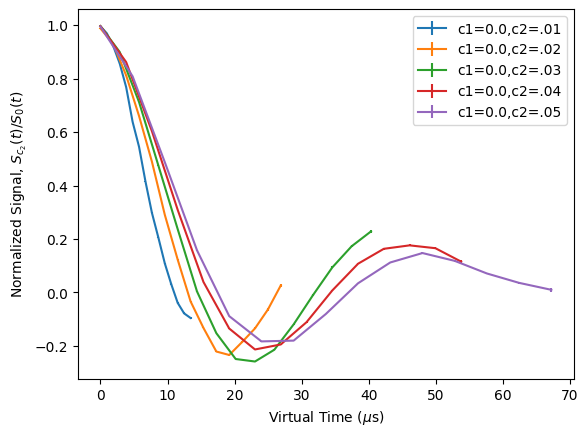

In [457]:
#plt.errorbar(times, fids[(0.0, .0)], err_data[(0.0,0.0)], label="c1=0.0,c2=0.0", color="black")
plt.errorbar(times*.01, fids[(0.0, .01)]/fids[(0.0, .0)], err_data[(0.0,0.01)]/fids[(0.0, .0)], label="c1=0.0,c2=.01")
plt.errorbar(times*.02, fids[(0.0, .02)]/fids[(0.0, .0)], err_data[(0.0,0.02)]/fids[(0.0, .0)], label="c1=0.0,c2=.02")
plt.errorbar(times*.03, fids[(0.0, .03)]/fids[(0.0, .0)], err_data[(0.0,0.03)]/fids[(0.0, .0)], label="c1=0.0,c2=.03")
plt.errorbar(times*.04, fids[(0.0, .04)]/fids[(0.0, .0)], err_data[(0.0,0.04)]/fids[(0.0, .0)], label="c1=0.0,c2=.04")
plt.errorbar(times*.05, fids[(0.0, .05)]/fids[(0.0, .0)], err_data[(0.0,0.05)]/fids[(0.0, .0)], label="c1=0.0,c2=.05")
plt.legend()
plt.xlabel(rf"Virtual Time ($\mu$s)")
plt.ylabel(r"Normalized Signal, $S_{c_2}(t)/S_0(t)$")
plt.show()

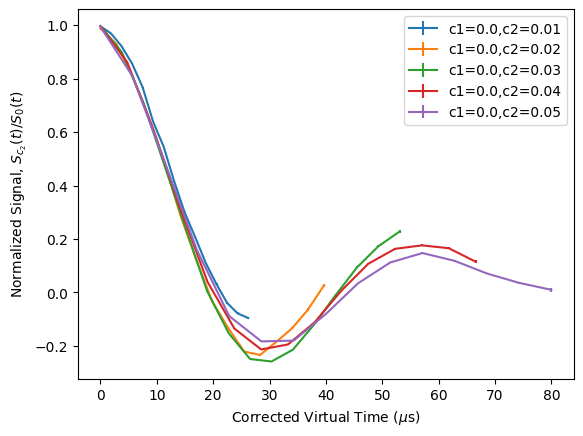

In [456]:
def func(x):
    return x+.0095

def normalized_error(signal, signal_err, ref, ref_err):
    """
    Calculate the propagated error for (signal/ref) given errors on both.
    signal, ref: arrays or floats
    signal_err, ref_err: arrays or floats (same shape as signal/ref)
    Returns: propagated error array or float
    """
    return np.sqrt((signal_err / ref) ** 2 + (signal * ref_err / ref ** 2) ** 2)

for c2 in np.arange(0.01, 0.06, 0.01):
    plt.errorbar(times*func(c2), fids[(0.0, c2)]/fids[(0.0, .0)], normalized_error(fids[(0.0,c2)],err_data[(0.0,c2)],fids[(0.0,0.0)],err_data[(0.0,0.0)]), label=f"c1=0.0,c2={c2:.2f}")

plt.legend()
plt.xlabel(rf"Corrected Virtual Time ($\mu$s)")
plt.ylabel(r"Normalized Signal, $S_{c_2}(t)/S_0(t)$")
plt.show()

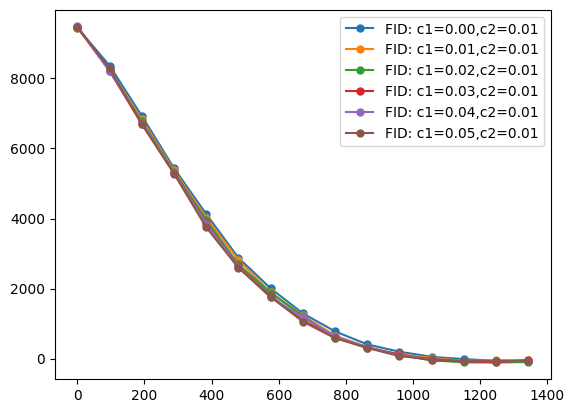

In [ ]:
# 6/24 pp=ken_fid_3d_test_fc10
# c2 =.01, disorder variable
expt = nmr.Experiment(873, folder='expt9')
data = expt.load_tpc3d(normalize=False,use_real=True)
err_data = np.real(expt.nmr_data)

c1_list = [0,.01,.02,.03,.04,.05]
c2 = .01
times = np.arange(0*T, 15*T,T)
errs = np.mean(err_data[:,:, -50:], axis=1)

for seq, c1 in zip(data, c1_list):
    plt.plot(times, seq, label=f"FID: c1={c1:.2f},c2={c2:.2f}", marker="o", markersize=5)
    plt.legend()
plt.show()


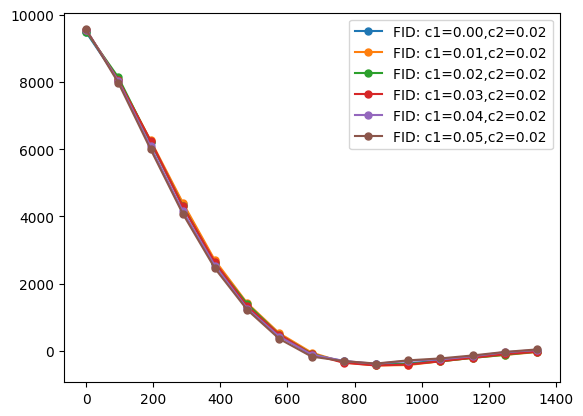

In [ ]:
# 6/25 pp=ken_fid_3d_test_fc10
# c2 =.02, disorder variable
expt = nmr.Experiment(877, folder='expt9')
data = expt.load_tpc3d(normalize=False,use_real=True)
err_data = np.real(expt.nmr_data)

c1_list = [0,.01,.02,.03,.04,.05]
c2 = .02
times = np.arange(0*T, 15*T,T)
errs = np.mean(err_data[:,:, -50:], axis=1)

for seq, c1 in zip(data, c1_list):
    plt.plot(times, seq, label=f"FID: c1={c1:.2f},c2={c2:.2f}", marker="o", markersize=5)
    plt.legend()
plt.show()


c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


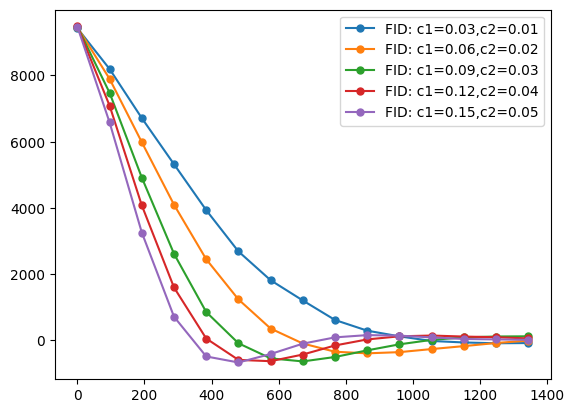

In [491]:
# 6/26 pp=ken_fid_3d_equal_fc10
# c1/3 = c2 trace, should be rescale of internal H
expt = nmr.Experiment(883, folder='expt9')
data = expt.load_tpc3d(normalize=False,use_real=True)
err_data = np.real(expt.nmr_data)

c2_lst = [.01, .02, .03, .04, .05]
c1_lst = [3*c2 for c2 in c2_lst]

times = np.arange(0*T, 15*T,T)
errs = np.mean(err_data[:,:, -50:], axis=1)

for seq, c1, c2 in zip(data, c1_lst, c2_lst):
    plt.plot(times, seq, label=f"FID: c1={c1:.2f},c2={c2:.2f}", marker="o", markersize=5)
    plt.legend()
plt.show()


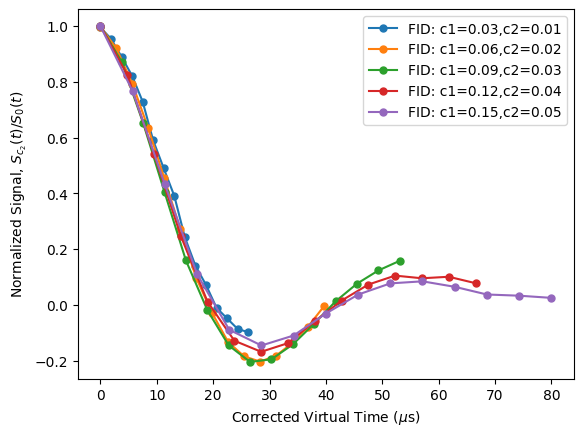

In [515]:
def offset_func(c1,c2):
    return np.sqrt((0)*(c1)**2  + (c2+.0095)**2)

for seq, c1, c2 in zip(data, c1_lst, c2_lst):
    plt.plot(offset_func(c1,c2)*times  , seq / fids[(0.0,0.0)],  label=f"FID: c1={c1:.2f},c2={c2:.2f}", marker="o", markersize=5)
    plt.legend()
    
plt.xlabel(rf"Corrected Virtual Time ($\mu$s)")
plt.ylabel(r"Normalized Signal, $S_{c_2}(t)/S_0(t)$")
plt.show()


In [ ]:
# 6/26 pp=ken_fid_3d_disordercal_fc10
# c1 variable, c2=0
# this should be half a gaussian with width determined by c1
expt = nmr.Experiment(884, folder='expt9')
data = expt.load_tpc3d(normalize=False,use_real=True)
err_data = np.real(expt.nmr_data)

c1_lst = [0, .01, .02, .03, .04, .05]
c2=0

times = np.arange(0*T, 15*T,T)
errs = np.mean(err_data[:,:, -50:], axis=1)

for seq, c1, c2 in zip(data, c1_lst, c2_lst):
    plt.plot(times, seq, label=f"FID: c1={c1:.2f},c2={c2:.2f}", marker="o", markersize=5)
    plt.legend()
plt.show()
